# Milestone 5
## Group 45

- Jussan Da Silva Bahia Nascimento
- Selina Qian
- Mengdi Chai
- Zhongling Tang
- Daisy Lyu

## Table of Contents

1. Introduction
2. Goal
3. Research Question
4. Dataset description
5. Feature Engineering
6. Preprocess
    - 6.1 Duplicates
    - 6.2 Missing Values
    - 6.3 Data Aggregation & Customer Lifetime Value (CLV) Modeling Strategy
    - 6.4 Imbalance Analysis & Distributions
    - 6.5 Dataset split in train and test
    - 6.6 Normalization
7. Exploratory Data Analysis (EDA)
    - 7.1 Boxplots
    - 7.2 Correlation Analysis
8. Customer Segmentation
    - 8.1 PCA for dimesionality reduction
    - 8.2 K-means for clustering
    - 8.3 EDA with the final clusters
9. Customer Lifetime Value Prediction Models
    - 9.1 Baseline model - Multilinear regression
    - 9.2 Towards the Final model - Random Forest Regression
    - 9.3 Towards the Final model - Neural Networks
    - 9.4 Final Model - Lasso regression
10. Value-Based Bidding Algorithms
    - 10.1 Basic Value-Based Bidding algorithm
    - 10.2 Advanced Value-Based Bidding algorithm
11. Conclusion & Further improvements
    - 11.1 Conclusions
    - 11.2 Strenghts and Limitations
    - 11.3 Further improvements

In [1]:
# load all necessary libraries
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

# Transformations
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

# Clutering
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Model selection
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_validate,
    KFold,
    GridSearchCV
)

# Regression Modelling & Evaluation
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Neural Networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization

# Advanced bidding stystem
import gym
from gym import spaces
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback
from tqdm import trange
from functools import partial

# Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# # connect to google drive
# from google.colab import drive
# drive.mount('/content/drive')

2025-05-08 16:36:20.403496: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-08 16:36:20.403540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-08 16:36:20.404231: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-08 16:36:20.408973: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


We used a comprehensive set of libraries to support data processing, modeling, and simulation:

*   Pandas, NumPy, Matplotlib, and Seaborn were used for data handling and visualization, while missingno helped assess data completeness.

*   For feature engineering and transformations, we applied tools from scikit-learn, including scalers, encoders, PCA, and pipelines.


*   Clustering methods like KMeans and MiniBatchKMeans enabled customer segmentation, evaluated using silhouette and Davies-Bouldin scores.

*   We built and validated predictive models using regression (Linear, Lasso, Random Forest) and neural networks (via TensorFlow/Keras), optimizing with cross-validation and grid search.

*   Statsmodels supported multicollinearity analysis with VIF.

*   For our advanced value-based bidding system, we used Gym for environment design and Stable Baselines3 (DQN) for reinforcement learning.




## 1. Introduction

In today's highly competitive digital advertising landscape, businesses are constantly seeking smarter, more efficient ways to reach and retain high-value customers ([Prediciting LTV Whitepaper](https://github.com/facebookincubator/LTVision/blob/main/Predicting-LTV-Whitepaper.pdf)). Bidding strategies that do not account for the long-term value a customer can bring, can lead to suboptimal budget allocation and missed opportunities for growth. At the same time, the increasing availability of behavioral and transactional data presents an opportunity to better understand customer heterogeneity and tailor marketing efforts accordingly ([A Deep Probabilistic Model for Customer Lifetime Value Prediction](https://research.google/pubs/a-deep-probabilistic-model-for-customer-lifetime-value-prediction/) and [value-based-bidding.com](https://www.value-based-bidding.com/resolving-ad-efficiency-with-target-roas-approaches/)).

Customer segmentation and customer lifetime value (CLV) prediction have emerged as powerful tools for driving personalized marketing. By clustering customers based on their behaviors and purchase histories, businesses can identify distinct audience segments and design more targeted strategies. [AI Agents for CLV prediction](https://www.rapidinnovation.io/post/ai-agents-for-customer-lifetime-value-prediction).


## 2. Goal

The objective of this project is to build a scalable and interpretable machine learning framework that integrates customer segmentation, customer value prediction, and a value-based bidding system for digital advertising. By clustering customers using behavioral and transactional data, we identify meaningful segments that inform a predictive model of customer lifetime value (CLV). This predicted value serves as the foundation of a value-based bidding strategy, where advertisers allocate budget based on each customer’s estimated future worth. The system simulates real-time auction dynamics to evaluate performance in terms of Return on Ad Spend (ROAS) and budget utilization, ultimately enabling more personalized marketing and smarter ad spend decisions.


## 3. Research question

How can advanced machine learning techniques improve the scalability and interpretability of customer segmentation by identifying evolving, value-driven customer groups that enable personalized marketing and strategic decision-making?

How can customer segmentation and predicted customer value be leveraged to design effective bidding strategies that maximize ad performance and minimize costs in the absence of real-world auction data?

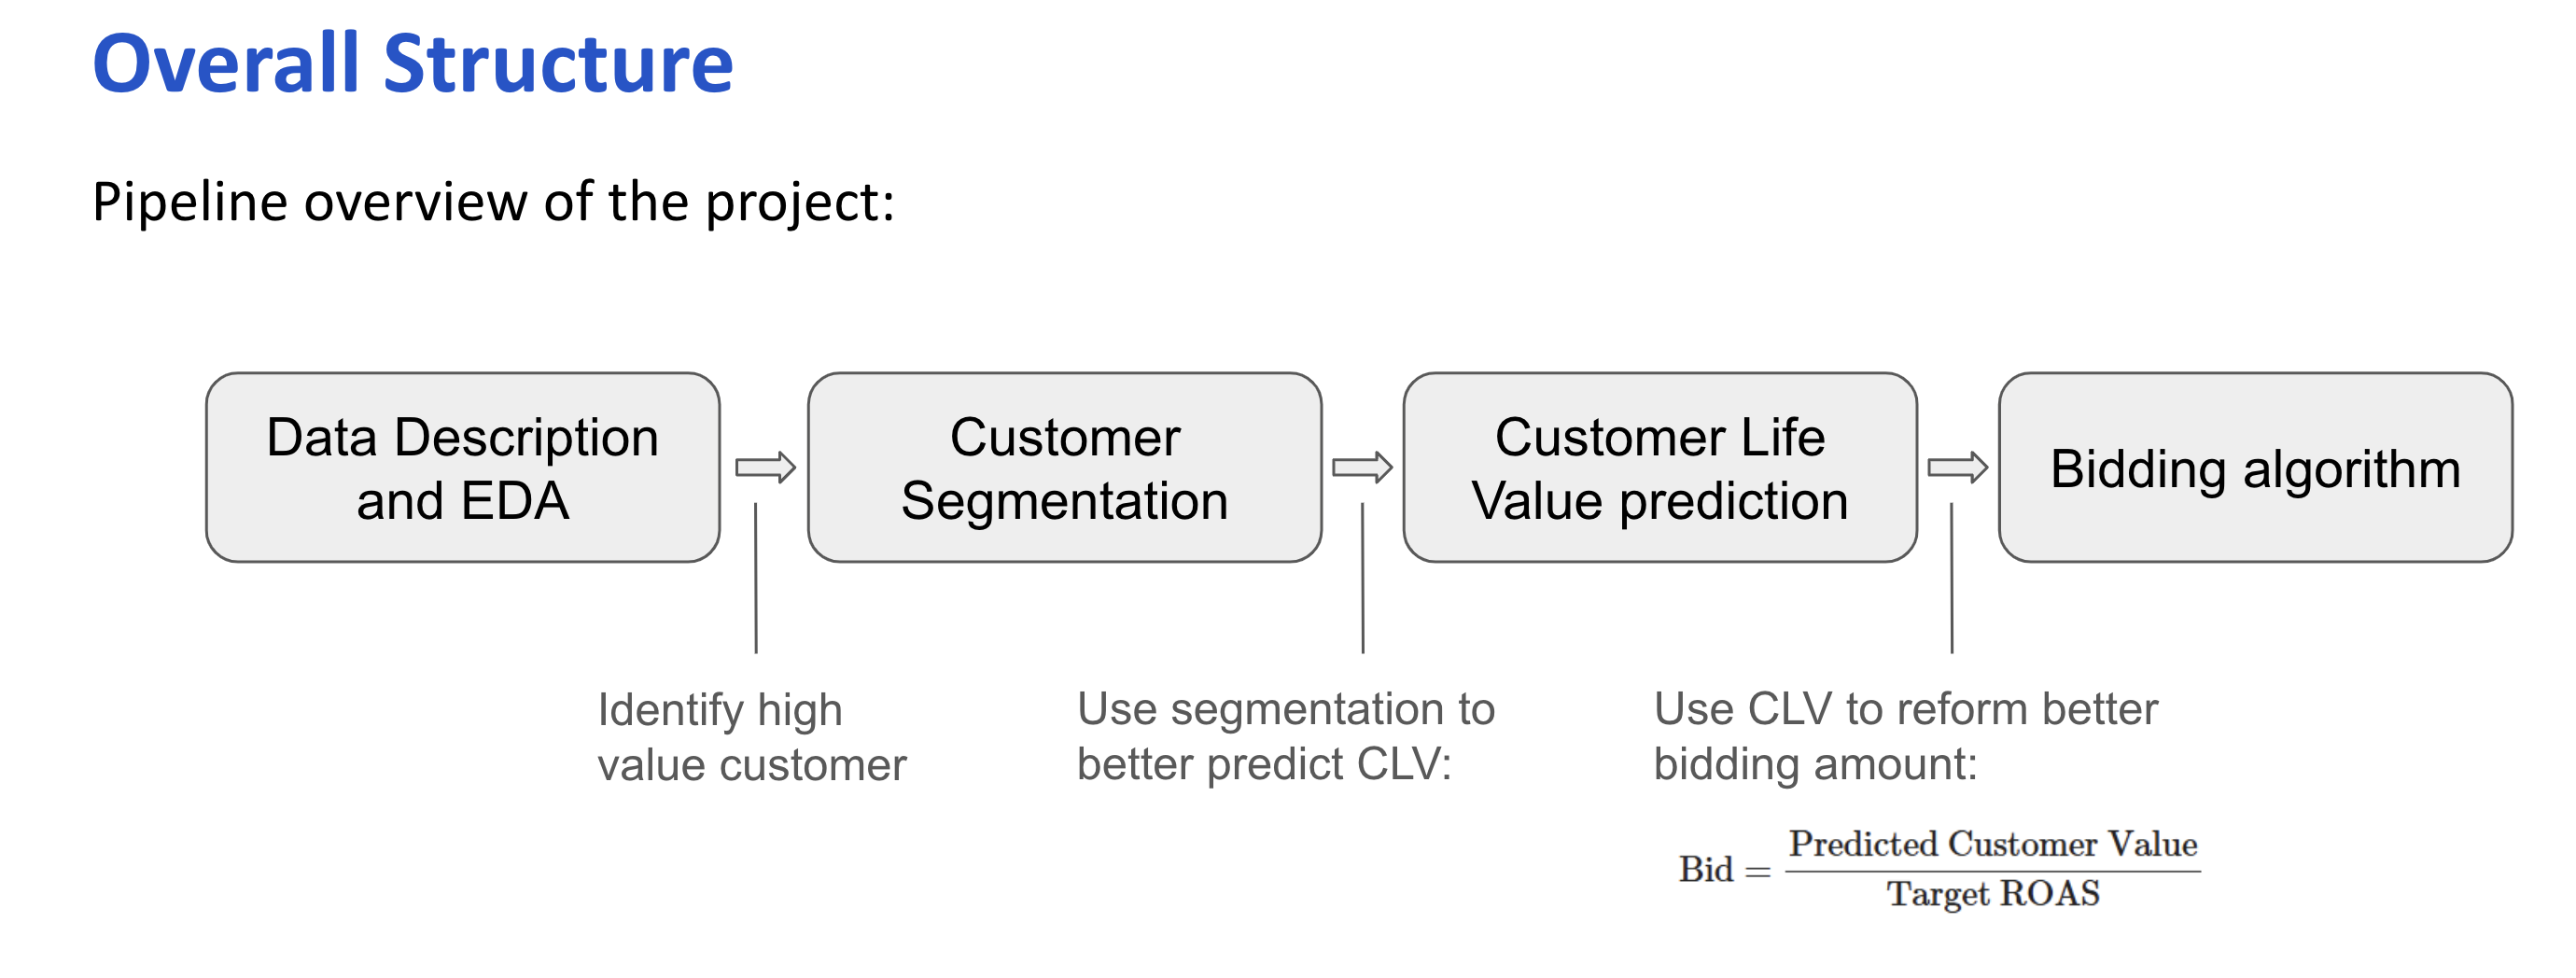

## 4. Dataset description

The dataset, acquired from [Kaggle](https://www.kaggle.com/datasets/sahilprajapati143/retail-analysis-large-dataset) has 302010 rows and 30 columns, and the total size of the data is 81MB. The dataset provides transactional data related to customer purchases, products, and order details. It includes customer demographics, transaction history, product information, geographic details, and temporal trends. Below is a summary of its key aspects:

1. Customer Information
This section includes demographic and personal information:

*  Identifiers: Customer_ID, Name, Email, Phone
*  Demographics/Personal Information: Age, Gender, Income, Customer_Segment (Premium, Regular, New)

These columns are used to support the customer segmentation model and help model purchasing tendencies or economic capacity based on income and segmentation, which may be relevant in personalized bidding strategies.

2. Transaction Details
These columns provide detailed customer transactions:

* Transaction-specific: Transaction_ID, Last_Purchase_Date, Amount (amount of each purchase in a transaction), Total_Purchases (total purchases in a transaction), Total_Amount (total amount in a transaction).

* Others: Shipping_Method, Payment_Method, Order_Status, Feedback

These columns are important because recording customer transaction history and purchase volume is crucial for building predictive models that seek to maximize return on bidding investment or customer conversion.


3. Product Information
Product-level details include Product_Category (e.g., electronics, clothing), Product_Brand, Product_Type, and Ratings (customer ratings on products).
These features help people to evaluate product popularity and customer preference, which can help to build bidding strategies based on product attractiveness for customers.


4. Geographic Information
Includes City, State, and Country fields that help analyze regional differences in shopping behavior, such as identifying areas where certain products are more popular or customer preferences vary by location.

5. Temporal Information
The Last_Purchase_Date included Year, Month, Date, and Time.
Temporal trends in purchasing behavior are useful for understanding seasonality and predicting optimal bidding times.

## 5. Feature Engineering
To support the creation of a bidding algorithm model, several features from the dataset can offer valuable insights into customer behavior and product demand. For instance, recency of purchase can help identify recently active users who are more likely to respond to targeted bids. Besides, customer lifetime value (CLV) (estimated through total purchases and average spending) can help us to identify the high-value customers who are more profitable in the long term. Some other features like product popularity and feedback sentiment will also help build the model. Purchase frequency can be inferred by counting the number of transactions per Customer_ID using Transaction_ID or by leveraging the Total_Purchases column. Product popularity and regional demand can be estimated by grouping Product_Category with Country, State, or City to compute how frequently products are purchased in each region, helping people to make bids based on local preferences.


These features can help simulate realistic bidding scenarios by adjusting bid amounts based on a customer's possibility to convert, expected purchase value, or engagement level. While the exact structure of the bidding model is still under development, we plan to incorporate several of these engineered features into the model to appropriately allocate bidding resources for maximum impact.

In [2]:
# Load dataset
# df = pd.read_csv('/content/drive/My Drive/CS109B_Group45_FinalProject/data/new_retail_data.csv')
df = pd.read_csv('data/new_retail_data.csv')
print(df.shape)
display(df.head().T)

(302010, 30)


,0,1,2,3,4
Transaction_ID,8691788.0,2174773.0,6679610.0,7232460.0,4983775.0
Customer_ID,37249.0,69749.0,30192.0,62101.0,27901.0
Name,Michelle Harrington,Kelsey Hill,Scott Jensen,Joseph Miller,Debra Coleman
Email,Ebony39@gmail.com,Mark36@gmail.com,Shane85@gmail.com,Mary34@gmail.com,Charles30@gmail.com
Phone,1414786801.0,6852899987.0,8362160449.0,2776751724.0,9098267635.0
Address,3959 Amanda Burgs,82072 Dawn Centers,4133 Young Canyon,8148 Thomas Creek Suite 100,5813 Lori Ports Suite 269
City,Dortmund,Nottingham,Geelong,Edmonton,Bristol
State,Berlin,England,New South Wales,Ontario,England
Zipcode,77985.0,99071.0,75929.0,88420.0,48704.0
Country,Germany,UK,Australia,Canada,UK


In [3]:
# Inspecting monetary information for one customer as example
df.loc[df["Customer_ID"]==37249.0, ["Date", "Total_Purchases", "Total_Amount", "Amount", "Product_Type", "Product_Category"]]

,Date,Total_Purchases,Total_Amount,Amount,Product_Type,Product_Category
0,9/18/2023,3.0,324.086270,108.028757,Shorts,Clothing
9670,6/14/2023,7.0,531.117667,75.873952,Smartphone,Electronics
61773,2/6/2024,6.0,2276.302319,379.383720,Furniture,Home Decor
100184,12/8/2023,4.0,594.550754,148.637688,Shirt,Clothing
205362,1/2/2024,8.0,2759.332518,344.916565,Water,Grocery


In [4]:
# Target
target_var = "CLV_6M"

# Numerical features
numerical_vars = [
    'Age',
    'Total_Spend',
    'Total_Orders',
    'Total_Unique_Products',
    'Total_Unique_Brands',
    'Avg_Rating',
    'Total_Feedback_Comments',
    'Customer_Lifespan',
    'Recency',
    'Purchase_Frequency',
    'Avg_Order_Value'
]

# Categorical features
categorical_vars = [
    'Gender',
    'Income',
    'Country',
    'Product_Category',
    'Product_Brand',
    'Transaction_Month',
    'Shipping_Method',
    'Payment_Method',
    'Order_Status'
]

## 6. Preprocess


Since our dataset contains many columns, we first need to drop some unnecessary ones, such as name, email, phone, address, state, zipcode, time, and amount.
<br>
<br>
The reason for dropping name, email, phone, address, state, and zipcode is that these are personally identifiable customer information. In our analysis, we aim to treat customers as a group rather than as individuals, so removing these details is appropriate.
<br>
<br>
Regarding the time variable, we observed that the dataset spans only one year. Since this limited time frame does not have a significant impact on our analysis, we have decided to drop this variable.
<br>
<br>
Finally, for the amount variable, we already have a “total amount” column. Since “amount” is redundant, we remove it to avoid duplication.

In [5]:
# Convert Date Columns
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    301677 non-null  float64       
 1   Customer_ID       301702 non-null  float64       
 2   Name              301628 non-null  object        
 3   Email             301663 non-null  object        
 4   Phone             301648 non-null  float64       
 5   Address           301695 non-null  object        
 6   City              301762 non-null  object        
 7   State             301729 non-null  object        
 8   Zipcode           301670 non-null  float64       
 9   Country           301739 non-null  object        
 10  Age               301837 non-null  float64       
 11  Gender            301693 non-null  object        
 12  Income            301720 non-null  object        
 13  Customer_Segment  301795 non-null  object        
 14  Date

In [6]:
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Date,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301651,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023-08-30 16:17:07.497339136,2023.165113,5.359729,255.163659,1367.651156,3.162670
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023-03-01 00:00:00,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023-05-31 00:00:00,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023-08-31 00:00:00,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023-11-30 00:00:00,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024-02-29 00:00:00,2024.000000,10.000000,499.997911,4999.625796,5.000000
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,NaN,0.371283,2.868575,141.389640,1128.998515,1.320827


In [7]:
# Check min and max date in the dataset
min_date = df.Date.min()
max_date = df.Date.max()
print(f'The data goes from {min_date} to {max_date}')

The data goes from 2023-03-01 00:00:00 to 2024-02-29 00:00:00


We can observe that we have 1 year of data at our disposal for the analysis.

In [8]:
# Drop unnecessary columns for the analysis:
# Name, Email, Phone, Address, Zipcode, City, State,Time, Amount as we have Total Amount, Year as it's one year of data
# Total Purchases as we can count Transaction id
# Total Amount as can sum Amount
unec_columns = ["Transaction_ID", "Name", "Email", "Phone", "Address", "Zipcode", "Time", "Amount", "City", "State", "Year"]
print("Columns before removing unecessary columns:", df.columns)
df = df.drop(columns=unec_columns)
print("\nColumns before after unecessary columns:", df.columns)

Columns before removing unecessary columns: Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

Columns before after unecessary columns: Index(['Customer_ID', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment',
       'Date', 'Month', 'Total_Purchases', 'Total_Amount', 'Product_Category',
       'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method',
       'Payment_Method', 'Order_Status', 'Ratings', 'products'],
      dtype='object')


### 6.1 Duplicates

We also need to check whether our dataset contains any duplicate values since it is quite large. If duplicates are present, we should remove them.

In [9]:
# Drop duplicates
print("Number of rows before dropping duplicates:", df.shape[0])
df = df.drop_duplicates()
print("Number of rows after dropping duplicates:", df.shape[0])

Number of rows before dropping duplicates: 302010
Number of rows after dropping duplicates: 302006


### 6.2 Missing Values

One of the most important preprocessing steps is handling missing values. In our analysis, we first check for missing values, determine their type, and decide how to address them.

In [10]:
# Check Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
print("Missing Values Overview:\n", missing_df[missing_df["Missing Values"] > 0])

Missing Values Overview:
                   Missing Values  Percentage
Customer_ID                  308    0.101985
Country                      271    0.089733
Age                          173    0.057284
Gender                       317    0.104965
Income                       290    0.096025
Customer_Segment             215    0.071191
Date                         359    0.118872
Month                        273    0.090396
Total_Purchases              361    0.119534
Total_Amount                 350    0.115892
Product_Category             283    0.093707
Product_Brand                281    0.093045
Feedback                     184    0.060926
Shipping_Method              337    0.111587
Payment_Method               297    0.098342
Order_Status                 235    0.077813
Ratings                      184    0.060926


<Axes: >

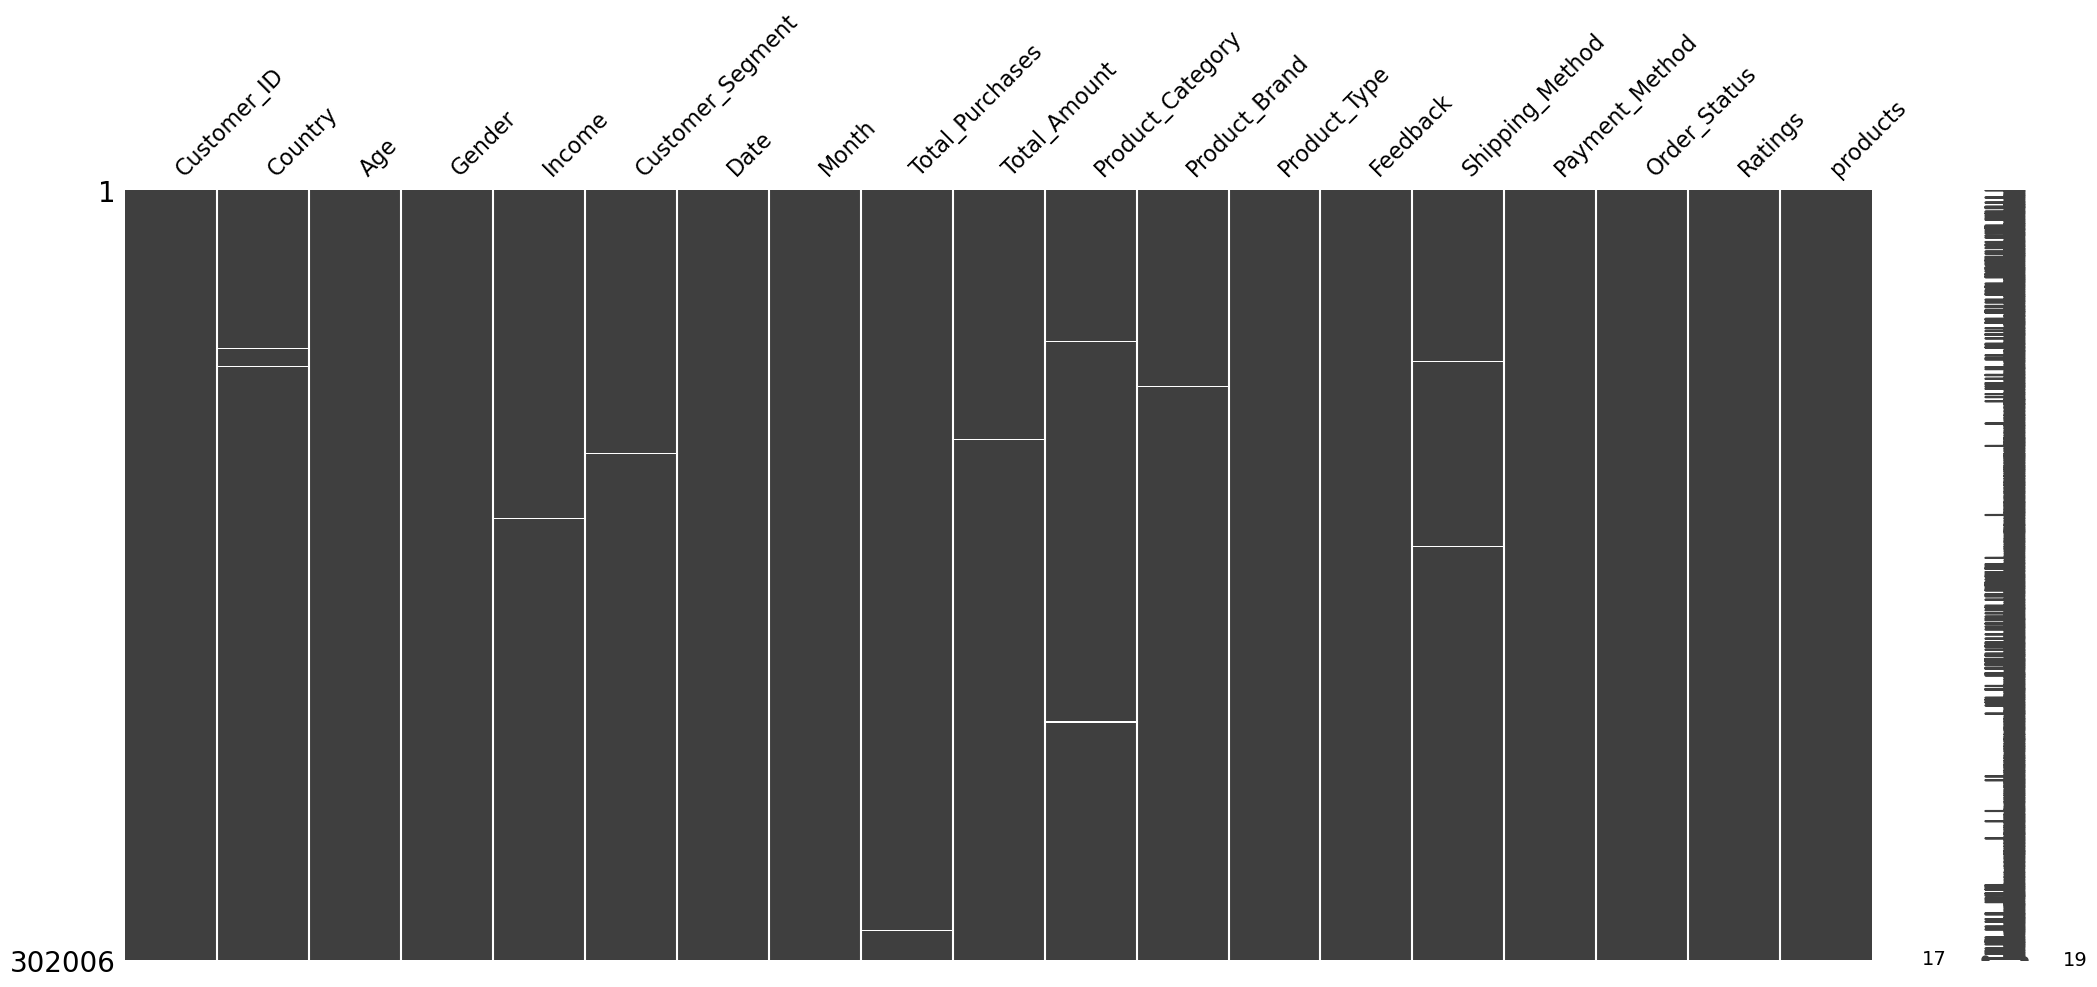

In [11]:
# Visualizing missing values
msno.matrix(df)

As we can see above, the percentage of missing values by column varies from 6 to 11%. Moreover, by looking at the heatmap above, it seems that the missing values are Missing Completely at Random (MCAR). We confirm that by checking the [Kaggle's page of the dataset](https://www.kaggle.com/datasets/sahilprajapati143/retail-analysis-large-dataset) that says that Null values are randomly distributed across rows. Moreover, only %1.7 of the 302 thousand rows contain null values, as shown below. Therefore, we decide to drop any row containing a Null value as this will not impact our Customer segmentation analysis.


In [12]:
null_rows_pct = round(100*(df.isnull().any(axis=1).sum() / df.shape[0]), 2)
print(f'%{null_rows_pct} of the total {df.shape[0]} rows contain null values')

%1.49 of the total 302006 rows contain null values


In [13]:
print("Number of rows in the dataset before dropping Null values:", df.shape[0])
df = df.dropna()
print("Number of rows in the dataset after dropping Null values:", df.shape[0])

Number of rows in the dataset before dropping Null values: 302006
Number of rows in the dataset after dropping Null values: 297497


In [14]:
# Check Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
print("Missing Values Overview:\n", missing_df[missing_df["Missing Values"] > 0])

Missing Values Overview:
 Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


### 6.3 Data Aggregation & Customer Lifetime Value (CLV) Modeling Strategy

As our goal is to build customer segmentation analysis, we are interesed in information at customer level. Moreover, to predict CLV, we adopt the cohort-based and dataset split approached inspired by the work of Wang et al. (2019) in "A Deep Probabilistic Model for Customer Lifetime Value Prediction" and in "Hands-On Data Science for Marketing" book, published by Packt.

- 1. Cohort Definition: Customers are selected based on a common entry point. Specifically, those who did 1, 2 or 3 transactions, occurred within the first 6 months (March 1 to August 31, 2023). This aligns all customers in terms of lifecycle stage. Morever on transaction can contain more than one purchase in our dataset, and as we can see below, average transaction by month varies between 1 to 1.2.

- 2. Feature Construction: For each customer, transactional, behavioral and demographic features are aggregated using data available up to first six months. These features include purchase frequency, recency, total spend, product types, etc.
  
- 3. Prediction Target : The target variable is the total monetary value of purchases made by the customer following their 1st, 2nd, or 3rd transaction in the next 6 months.
     
- 4. Data Split: The dataset is split at the customer level, with 80% of customers used for training 20% for test. This is done before doing Normalization, PCA and K-means to avoid any data leakage.

Last we don't consider the `customer_segment` column as our goal is to build a customer segmentation on our own. Nevertheless, this column can help us to double check if our customer segmentation aligns with the segments given in the dataset.

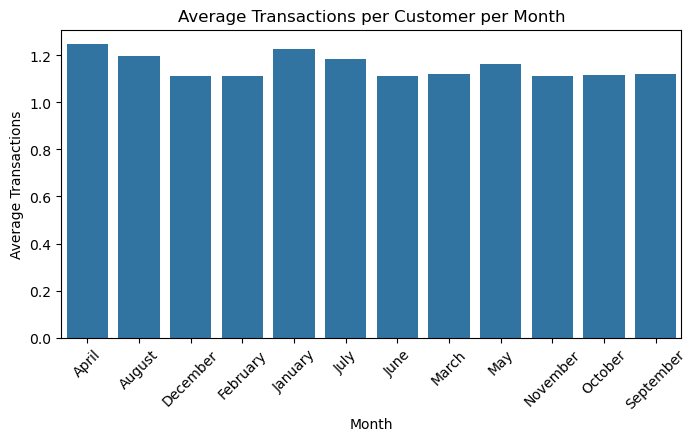

In [15]:
# Check average transaction per month
df = df.sort_values(by=['Customer_ID', 'Date'])

# Group by Month and Customer_ID to count transactions
transactions_per_month = df.groupby(['Month', 'Customer_ID']).size().reset_index(name='TransactionCount')

# Now, calculate the average number of transactions per customer each month
avg_transactions = transactions_per_month.groupby('Month')['TransactionCount'].mean().reset_index()

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.barplot(x='Month', y='TransactionCount', data=avg_transactions)
plt.xticks(rotation=45)
plt.title('Average Transactions per Customer per Month')
plt.xlabel('Month')
plt.ylabel('Average Transactions')
plt.show()


In [16]:
# Sort dataset
df = df.sort_values(by=['Customer_ID', 'Date'])

# Cohort Definition
start_date = '2023-03-01'
end_date = '2023-09-01'

# Filter customers who made purchases within the specified time period
df_first3 = df[(df['Date'] >= start_date) & (df['Date'] < end_date)]

# Group by customer_id and count the number of transactions
customer_transaction_counts = df_first3.groupby('Customer_ID')['Date'].count()

# Filter to customers with exactly 1 transaction
valid_customers = customer_transaction_counts[customer_transaction_counts.isin([1,2,3])].index

# Now filter the data to only include those customers
df_first3 = df_first3[df_first3['Customer_ID'].isin(valid_customers)]
display(df_first3.shape)
display(df_first3.head())

(113734, 19)

,Customer_ID,Country,Age,Gender,Income,Customer_Segment,Date,Month,Total_Purchases,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
231852,10000.0,USA,26.0,Male,Medium,Regular,2023-05-15,May,7.0,429.917804,Grocery,Coca-Cola,Water,Excellent,Same-Day,PayPal,Delivered,5.0,Sparkling water
297459,10000.0,Germany,22.0,Male,Low,Premium,2023-07-16,July,3.0,395.898272,Home Decor,Bed Bath & Beyond,Bedding,Good,Express,Credit Card,Delivered,4.0,Quilt
290160,10000.0,USA,64.0,Female,Low,Regular,2023-07-30,July,6.0,2683.057011,Electronics,Samsung,Tablet,Average,Express,Debit Card,Pending,2.0,Amazon Fire Tablet
9772,10001.0,UK,19.0,Male,Medium,Regular,2023-03-15,March,3.0,367.457739,Grocery,Coca-Cola,Soft Drink,Bad,Express,Cash,Delivered,1.0,Grape soda
145392,10001.0,USA,26.0,Male,High,Regular,2023-08-26,January,4.0,1208.329039,Electronics,Apple,Tablet,Good,Express,Credit Card,Delivered,3.0,iPad


In [17]:
# Create columns for aggregation
df_first3['Total_Unique_Products'] = df_first3['Product_Category']
df_first3['Total_Unique_Brand'] = df_first3['Product_Brand']
df_first3['First_Transaction_Date'] = df_first3['Date']
df_first3['Last_Transaction_Date'] = df_first3['Date']

In [18]:
# Aggregation by customer
customer_df = df_first3.groupby('Customer_ID').agg({
    # Financial Metrics
    'Total_Purchases': 'sum',  # Total number of purchases
    'Total_Amount': 'sum',  # Total amount spent by customer

    # Customer Profile
    'Age': 'mean',  # Average age (or mode if you prefer)
    'Gender': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent gender
    'Income': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent income

    # Geo profile
    'Country': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most freq. Country where transactions made

    # Product Preferences
    'Product_Category': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent product category
    'Product_Brand': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent product brand
    'Total_Unique_Products': lambda x: x.nunique(),  # Number of unique products bought
    'Total_Unique_Brand': lambda x: x.nunique(),  # Number of unique brands bought

    # Ratings & Feedback
    'Ratings': 'mean',  # Average rating
    'Feedback': 'count',  # Number of feedback comments given

    # Recency & Frequency
    'First_Transaction_Date': 'min', # First transaction
    'Last_Transaction_Date': 'max', # last transaction
    'Month': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most common purchase month

    # Shipping & Payment Preferences
    'Shipping_Method': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most used shipping method
    'Payment_Method': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most used payment method
    'Order_Status': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most freq. order stats

}).reset_index()

customer_df.head()

,Customer_ID,Total_Purchases,Total_Amount,Age,Gender,Income,Country,Product_Category,Product_Brand,Total_Unique_Products,Total_Unique_Brand,Ratings,Feedback,First_Transaction_Date,Last_Transaction_Date,Month,Shipping_Method,Payment_Method,Order_Status
0,10000.0,16.0,3508.873086,37.333333,Male,Low,USA,Electronics,Bed Bath & Beyond,3,3,3.666667,3,2023-05-15,2023-07-30,July,Express,Credit Card,Delivered
1,10001.0,7.0,1575.786778,22.500000,Male,High,UK,Electronics,Apple,2,2,2.000000,2,2023-03-15,2023-08-26,January,Express,Cash,Delivered
2,10002.0,8.0,991.623706,29.333333,Female,High,Australia,Books,Bed Bath & Beyond,3,3,3.000000,3,2023-04-20,2023-08-16,April,Same-Day,Credit Card,Delivered
3,10003.0,17.0,2340.496447,25.000000,Female,High,USA,Clothing,Nike,2,2,2.500000,2,2023-05-02,2023-07-17,August,Express,Debit Card,Delivered
4,10005.0,7.0,3073.147975,20.000000,Male,Medium,USA,Electronics,Apple,1,1,4.000000,1,2023-06-29,2023-06-29,June,Express,Debit Card,Delivered


In [19]:
# Rename columns for clarity
customer_df.columns = ['Customer_ID', 'Total_Orders', 'Total_Spend',
                       'Age', 'Gender', 'Income', 'Country', 'Product_Category',
                        'Product_Brand', 'Total_Unique_Products', 'Total_Unique_Brands',
                       'Avg_Rating', 'Total_Feedback_Comments', 'First_Transaction_Date',
                       'Last_Transaction_Date', 'Transaction_Month', 'Shipping_Method',
                       'Payment_Method', 'Order_Status']
# customer_df.columns = ['Customer_ID', 'Total_Orders', 'Total_Spend',
#                        'Age', 'Gender', 'Income', 'Country', 'Product_Category',
#                         'Product_Brand',
#                        'Avg_Rating','First_Transaction_Date',
#                        'Last_Transaction_Date', 'Transaction_Month', 'Shipping_Method',
#                        'Payment_Method', 'Order_Status']
# Check dataframe
customer_df.head()

,Customer_ID,Total_Orders,Total_Spend,Age,Gender,Income,Country,Product_Category,Product_Brand,Total_Unique_Products,Total_Unique_Brands,Avg_Rating,Total_Feedback_Comments,First_Transaction_Date,Last_Transaction_Date,Transaction_Month,Shipping_Method,Payment_Method,Order_Status
0,10000.0,16.0,3508.873086,37.333333,Male,Low,USA,Electronics,Bed Bath & Beyond,3,3,3.666667,3,2023-05-15,2023-07-30,July,Express,Credit Card,Delivered
1,10001.0,7.0,1575.786778,22.500000,Male,High,UK,Electronics,Apple,2,2,2.000000,2,2023-03-15,2023-08-26,January,Express,Cash,Delivered
2,10002.0,8.0,991.623706,29.333333,Female,High,Australia,Books,Bed Bath & Beyond,3,3,3.000000,3,2023-04-20,2023-08-16,April,Same-Day,Credit Card,Delivered
3,10003.0,17.0,2340.496447,25.000000,Female,High,USA,Clothing,Nike,2,2,2.500000,2,2023-05-02,2023-07-17,August,Express,Debit Card,Delivered
4,10005.0,7.0,3073.147975,20.000000,Male,Medium,USA,Electronics,Apple,1,1,4.000000,1,2023-06-29,2023-06-29,June,Express,Debit Card,Delivered


In [20]:
# Compute additional features to compute Customer Lifetime Value (CLV)
customer_df['Customer_Lifespan'] = (customer_df['Last_Transaction_Date'] - customer_df['First_Transaction_Date']).dt.days

# Calculate Purchase Frequency while handling zero active days and missing values
customer_df['Purchase_Frequency'] = np.where(
    (customer_df['Total_Orders'] > 0) &
    ((customer_df['Last_Transaction_Date'] - customer_df['First_Transaction_Date']).dt.days > 0),
    customer_df['Total_Orders'] / ((customer_df['Last_Transaction_Date'] - customer_df['First_Transaction_Date']).dt.days),
    0  # Set to 0 if the condition is not met (e.g., no purchases or zero active days)
)

customer_df['Recency'] = (df.Date.max() - customer_df['Last_Transaction_Date']).dt.days

customer_df['Avg_Order_Value'] = customer_df['Total_Spend']/customer_df['Total_Orders']

# # customer_df['CLV'] = customer_df['Avg_Order_Value']*customer_df['Purchase_Frequency']*customer_df['Customer_Lifespan']

# # Check dataframe
# customer_df.head()

In [21]:
# Drop First_Purchase_Date and Last_Purchase_Date
customer_df = customer_df.drop(["First_Transaction_Date", "Last_Transaction_Date"], axis=1)
# Check info
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64616 entries, 0 to 64615
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              64616 non-null  float64
 1   Total_Orders             64616 non-null  float64
 2   Total_Spend              64616 non-null  float64
 3   Age                      64616 non-null  float64
 4   Gender                   64616 non-null  object 
 5   Income                   64616 non-null  object 
 6   Country                  64616 non-null  object 
 7   Product_Category         64616 non-null  object 
 8   Product_Brand            64616 non-null  object 
 9   Total_Unique_Products    64616 non-null  int64  
 10  Total_Unique_Brands      64616 non-null  int64  
 11  Avg_Rating               64616 non-null  float64
 12  Total_Feedback_Comments  64616 non-null  int64  
 13  Transaction_Month        64616 non-null  object 
 14  Shipping_Method       

In [22]:
# Define Prediction Target (6-month CLV after the first transaction)

# Get the latest transaction for each customer as the "reference" point
transaction_dates = (
    df_first3.groupby('Customer_ID')['Date']
    .max()
    .reset_index()
    .rename(columns={'Date': 'Reference_Transaction_Date'})
)

# Merge into full dataset
transaction_dates_df = df.merge(transaction_dates, on='Customer_ID', how='left')

# Filter future purchases after that reference purchase date
future_transactions = transaction_dates_df[transaction_dates_df['Date'] > transaction_dates_df['Reference_Transaction_Date']]

transaction_series = transaction_dates.set_index('Customer_ID')['Reference_Transaction_Date']
future_transactions['time_since_transaction'] = (
    future_transactions['Date'] - future_transactions['Customer_ID'].map(transaction_series)
).dt.days

# Keep only those within 6 months (180 days)
future_transactions = future_transactions[future_transactions['time_since_transaction'] <= 180]

# Aggregate to get 6-Month-CLV (in the future)
target = future_transactions.groupby('Customer_ID')['Total_Amount'].sum().reset_index()

# Merge into the final customer dataframe
customer_df = customer_df.merge(target, on='Customer_ID', how='left')

# Rename for clarity
customer_df = customer_df.rename(columns={'Total_Amount': 'CLV_6M'})
# Customer with NA values for 6-Month-CLV, means no value
customer_df['CLV_6M'] = customer_df['CLV_6M'].fillna(0)
customer_df.head()

/tmp/ipykernel_26688/3510473319.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_transactions['time_since_transaction'] = (


,Customer_ID,Total_Orders,Total_Spend,Age,Gender,Income,Country,Product_Category,Product_Brand,Total_Unique_Products,...,Total_Feedback_Comments,Transaction_Month,Shipping_Method,Payment_Method,Order_Status,Customer_Lifespan,Purchase_Frequency,Recency,Avg_Order_Value,CLV_6M
0,10000.0,16.0,3508.873086,37.333333,Male,Low,USA,Electronics,Bed Bath & Beyond,3,...,3,July,Express,Credit Card,Delivered,76,0.210526,214,219.304568,1498.693271
1,10001.0,7.0,1575.786778,22.500000,Male,High,UK,Electronics,Apple,2,...,2,January,Express,Cash,Delivered,164,0.042683,187,225.112397,6560.676046
2,10002.0,8.0,991.623706,29.333333,Female,High,Australia,Books,Bed Bath & Beyond,3,...,3,April,Same-Day,Credit Card,Delivered,118,0.067797,197,123.952963,3112.390246
3,10003.0,17.0,2340.496447,25.000000,Female,High,USA,Clothing,Nike,2,...,2,August,Express,Debit Card,Delivered,76,0.223684,227,137.676262,0.000000
4,10005.0,7.0,3073.147975,20.000000,Male,Medium,USA,Electronics,Apple,1,...,1,June,Express,Debit Card,Delivered,0,0.000000,245,439.021139,0.000000


In [23]:
# Check correlation with Total Spend for the first transaction with CLV_6M
customer_df[["Total_Spend", "CLV_6M"]].corr()

,Total_Spend,CLV_6M
Total_Spend,1.000000,0.066964
CLV_6M,0.066964,1.000000


### 6.4 Imbalance Analysis & Distributions

We also need to perform an imbalance analysis to check whether our dataset contains highly imbalanced variables. If such an issue exists, we must determine an appropriate way to address it.

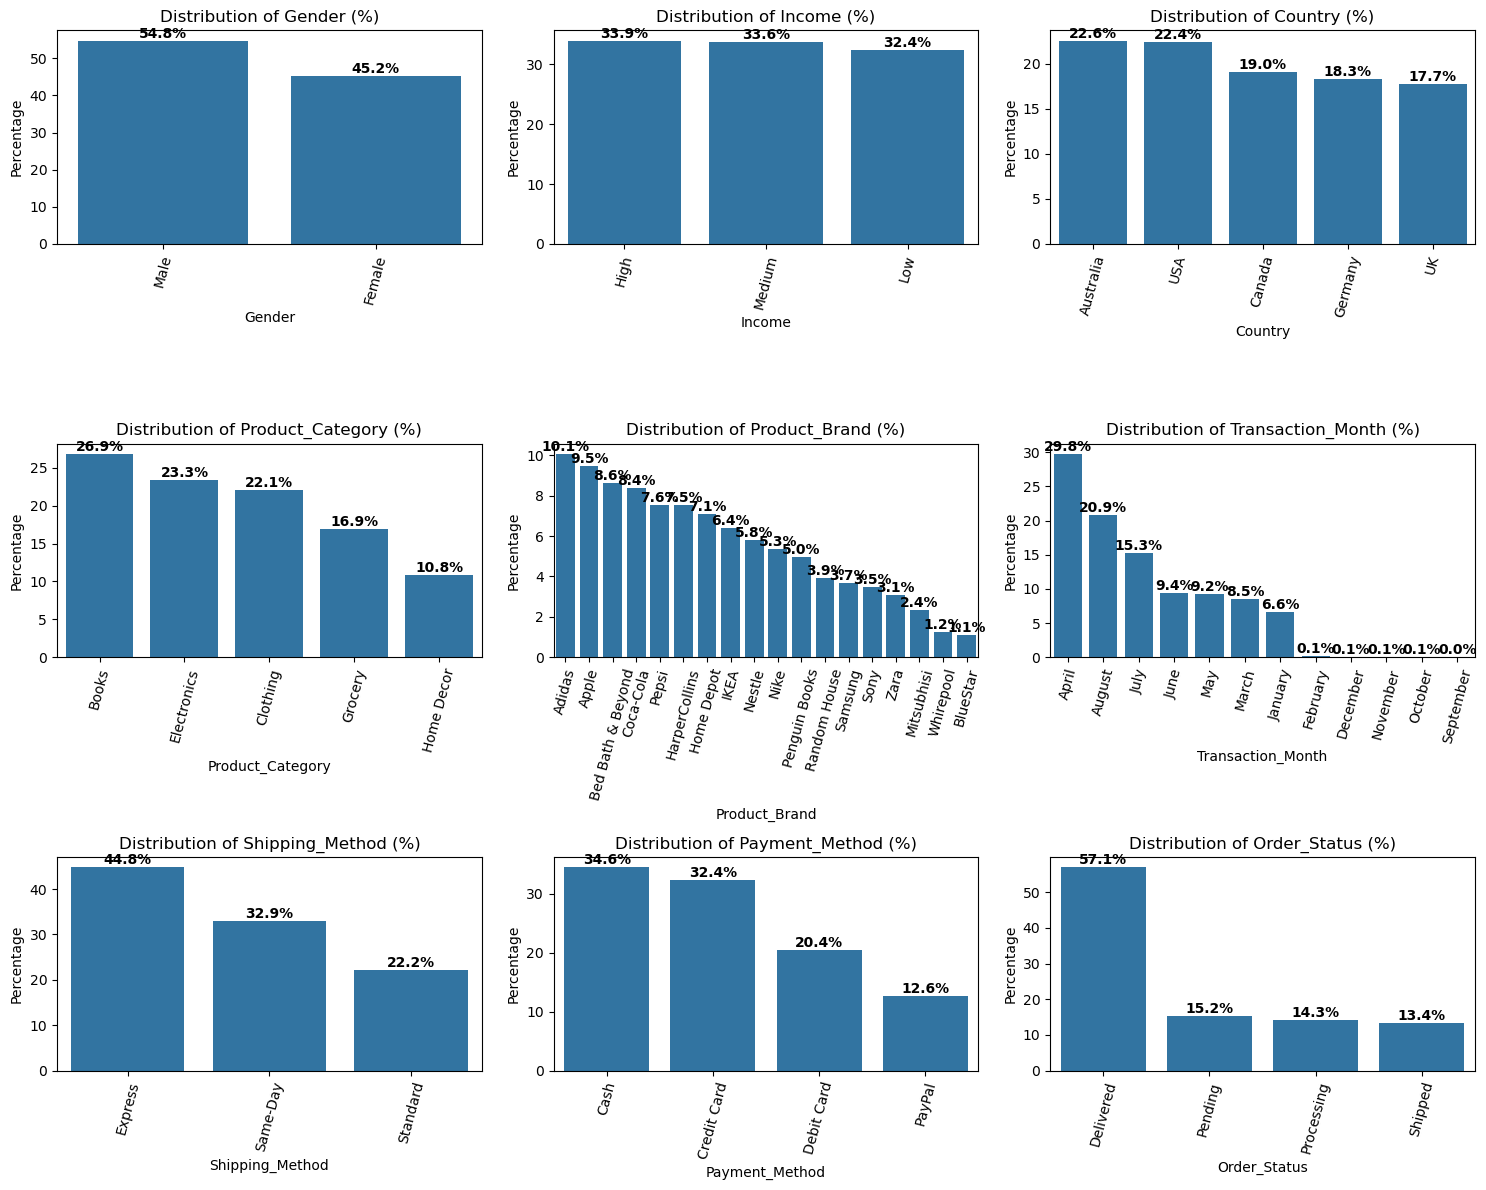

In [24]:
# Check data imbalance for Categorical variables
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Iterate through the categorical variables and plot them
for i, var in enumerate(categorical_vars):
    # Calculate percentage distribution
    category_counts = customer_df[var].value_counts(normalize=True) * 100

    # Create a bar plot with percentages
    sns.barplot(
        x=category_counts.index,
        y=category_counts.values,
        ax=axes[i],
    )

    # Add text annotations for each bar
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(
            p.get_x() + p.get_width() / 2,  # X position (center of the bar)
            height,  # Y position (top of the bar)
            f'{height:.1f}%',  # Format percentage with 1 decimal place
            ha='center', va='bottom', fontsize=10, fontweight='bold'
        )

    # Formatting
    axes[i].set_title(f"Distribution of {var} (%)")
    axes[i].set_ylabel("Percentage")
    axes[i].tick_params(axis='x', rotation=75)  # Rotate x-axis labels for readability

# Remove any empty subplots (if fewer than 9 variables)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Since our model uses unsupervised classification, there is no response variable to balance, and we do not need to deal with class imbalance. The algorithm groups data based on patterns without predefined labels. Additionally, the histogram shows that most features are relatively balanced, so artificial balancing would have the potential to distort the natural data distribution and harm model validity.

For the categorical variables. we can to aggregate lower frequent groups to "Others" as shown below. This can be useful later on if we decide to use categorical variables for model's predictions.

For evaluation, except for the evaluation of the model's accuracy, we will consider using metrics like silhouette score or the Davies-Bouldin index to assess cluster quality and separation.

In [25]:
def aggregate_categorical(df, column, threshold):
    """
    Aggregates categorical column values based on frequency threshold.

    Parameters:
    - df (DataFrame): Input dataframe.
    - column (str): The column name to aggregate.
    - threshold (float): The threshold for aggregation (e.g., 0.05 means 5%).

    Returns:
    - DataFrame: The dataframe with aggregated categorical values.
    """
    # Get the value counts of the column
    value_counts = df[column].value_counts(normalize=True)

    # Identify categories below the threshold
    rare_categories = value_counts[value_counts < threshold].index

    # Replace rare categories with 'Other'
    df[column] = df[column].apply(lambda x: x if x not in rare_categories else 'Other')

    return df

# Aggregate Product_Category with threshold of 3%
customer_df = aggregate_categorical(customer_df, 'Product_Brand', 0.03)

customer_df.head()

,Customer_ID,Total_Orders,Total_Spend,Age,Gender,Income,Country,Product_Category,Product_Brand,Total_Unique_Products,...,Total_Feedback_Comments,Transaction_Month,Shipping_Method,Payment_Method,Order_Status,Customer_Lifespan,Purchase_Frequency,Recency,Avg_Order_Value,CLV_6M
0,10000.0,16.0,3508.873086,37.333333,Male,Low,USA,Electronics,Bed Bath & Beyond,3,...,3,July,Express,Credit Card,Delivered,76,0.210526,214,219.304568,1498.693271
1,10001.0,7.0,1575.786778,22.500000,Male,High,UK,Electronics,Apple,2,...,2,January,Express,Cash,Delivered,164,0.042683,187,225.112397,6560.676046
2,10002.0,8.0,991.623706,29.333333,Female,High,Australia,Books,Bed Bath & Beyond,3,...,3,April,Same-Day,Credit Card,Delivered,118,0.067797,197,123.952963,3112.390246
3,10003.0,17.0,2340.496447,25.000000,Female,High,USA,Clothing,Nike,2,...,2,August,Express,Debit Card,Delivered,76,0.223684,227,137.676262,0.000000
4,10005.0,7.0,3073.147975,20.000000,Male,Medium,USA,Electronics,Apple,1,...,1,June,Express,Debit Card,Delivered,0,0.000000,245,439.021139,0.000000


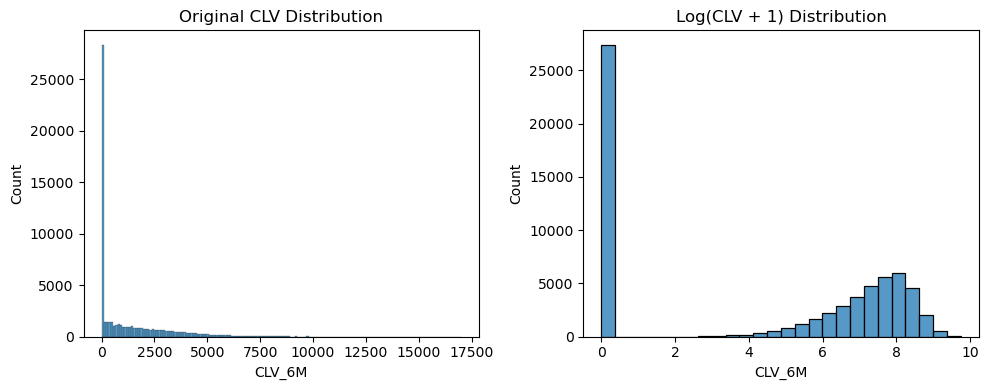

In [26]:
# Check distribution of CLV
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Original CLV distribution
sns.histplot(customer_df[target_var], ax=axes[0])
axes[0].set_title('Original CLV Distribution')

# log(CLV + 1) distribution
sns.histplot(np.log1p(customer_df[target_var]), ax=axes[1])
axes[1].set_title('Log(CLV + 1) Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


In terms of numerical data, we can observe some skewness that may impact model's performance. One of the ways to fix the skewnees is using log transformation. So in the modelling part we'll do this transformation.

### 6.5 Dataset split in train and test

Splitting the dataset into train and test before normalization, PCA, and KMeans is crucial to avoid data leakage.
These steps learn patterns from the data and if you apply them before splitting, the test set can "leak" into the model, leading to overly optimistic performance and poor generalization in the real world.

In [27]:
# Set random state
random_state = 42

# # Getting final preprocessed dataset
# customer_df_final = pd.concat([customer_df["Customer_ID"], customer_df_num_std_onehot, customer_df[target_var]], axis=1)

# Set X as all features except 'CLV' and y as the target
X = customer_df.drop(columns=[target_var])
y = customer_df[target_var]

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)

# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Keep customer in a train set copy
X_train_customer = X_train.copy()
X_train = X_train.drop(columns=["Customer_ID"])

X_test_customer = X_test.copy()
X_test = X_test.drop(columns=["Customer_ID"])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((51692, 20), (12924, 20), (51692,), (12924,))

### 6.6 Normalization

For the customer segmentation using clustering algorithms as K-Means, it makes to use numerical variables. K-Means is a distance-based clustering algorithm that relies on Euclidean distance to group similar data points. Since Euclidean distance is only meaningful for numerical variables, using categorical data directly in K-Means can lead to incorrect or misleading clusters. So we normalize the numerical variables.

In [28]:
# Normalize numerical features
scaler = StandardScaler()
X_train_scaled_num = scaler.fit_transform(X_train[numerical_vars])
X_test_scaled_num = scaler.transform(X_test[numerical_vars])

X_train_scaled_num = pd.DataFrame(X_train_scaled_num, columns=numerical_vars)
X_test_scaled_num = pd.DataFrame(X_test_scaled_num, columns=numerical_vars)
print(X_train_scaled_num.shape)
display(X_train_scaled_num.describe())
display(X_train_scaled_num.head())

(51692, 11)


,Age,Total_Spend,Total_Orders,Total_Unique_Products,Total_Unique_Brands,Avg_Rating,Total_Feedback_Comments,Customer_Lifespan,Recency,Purchase_Frequency,Avg_Order_Value
count,5.169200e+04,5.169200e+04,5.169200e+04,5.169200e+04,5.169200e+04,5.169200e+04,5.169200e+04,5.169200e+04,5.169200e+04,5.169200e+04,5.169200e+04
mean,-2.372508e-16,-8.219929e-17,1.184879e-16,8.687283e-17,1.440549e-16,-3.386253e-16,-1.458419e-16,-1.567010e-17,-2.705154e-16,-4.687284e-17,6.474225e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.397084e+00,-1.307547e+00,-1.504115e+00,-8.674434e-01,-9.489221e-01,-1.974565e+00,-9.945307e-01,-8.163492e-01,-1.423356e+00,-2.817480e-01,-2.023561e+00
25%,-9.161440e-01,-8.094108e-01,-7.917275e-01,-8.674434e-01,-9.489221e-01,-7.587263e-01,-9.945307e-01,-8.163492e-01,-8.673676e-01,-2.817480e-01,-7.695284e-01
50%,-1.145772e-01,-2.067581e-01,-7.933950e-02,-8.674434e-01,4.199366e-01,-1.508068e-01,3.166295e-01,-5.306058e-01,-1.723823e-01,-2.002975e-01,6.815500e-04
75%,7.270680e-01,5.920729e-01,6.330485e-01,6.577746e-01,4.199366e-01,7.610725e-01,3.166295e-01,7.144188e-01,7.608837e-01,-5.507673e-02,7.727420e-01
max,2.771063e+00,5.508852e+00,3.660697e+00,2.182993e+00,1.788795e+00,1.672952e+00,1.627790e+00,2.918725e+00,2.210425e+00,2.415342e+01,2.009330e+00


,Age,Total_Spend,Total_Orders,Total_Unique_Products,Total_Unique_Brands,Avg_Rating,Total_Feedback_Comments,Customer_Lifespan,Recency,Purchase_Frequency,Avg_Order_Value
0,2.690907,-1.190388,-0.079340,-0.867443,-0.948922,1.672952,-0.994531,-0.816349,-1.204932,-0.281748,-1.899774
1,-0.996301,-1.041409,-0.257436,-0.867443,-0.948922,-0.150807,-0.994531,-0.816349,1.396299,-0.281748,-1.592002
2,2.530593,-0.883639,-0.257436,-0.867443,-0.948922,-1.062686,-0.994531,-0.816349,-1.363786,-0.281748,-1.293408
3,-0.114577,-1.067476,-1.147921,-0.867443,-0.948922,0.761073,-0.994531,-0.816349,1.237445,-0.281748,-0.866419
4,-0.916144,0.554363,0.811145,2.182993,1.788795,0.153153,1.627790,-0.061170,0.701314,0.138513,-0.086607


We need to apply one-hot encoding to categorical features to convert them into a numerical format suitable for machine learning models. This process creates binary columns for each category, ensuring that algorithms can interpret categorical data correctly without assuming any ordinal relationships.

In [29]:
# One-hot encoding categorical features
X_train_scaled_onehot = pd.get_dummies(X_train[categorical_vars], dtype = int, drop_first = True).reset_index(drop=True)
X_test_scaled_onehot = pd.get_dummies(X_test[categorical_vars], dtype = int, drop_first = True).reset_index(drop=True)
print(X_train_scaled_onehot.shape)
display(X_train_scaled_onehot.head())

(51692, 45)


,Gender_Male,Income_Low,Income_Medium,Country_Canada,Country_Germany,Country_UK,Country_USA,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Grocery,...,Transaction_Month_October,Transaction_Month_September,Shipping_Method_Same-Day,Shipping_Method_Standard,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Order_Status_Pending,Order_Status_Processing,Order_Status_Shipped
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
3,1,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,1,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
# Concatenating standardized numerical columns with dummy categorical columns
X_train_scaled_final = pd.concat([X_train_scaled_num, X_train_scaled_onehot], axis=1)
X_test_scaled_final = pd.concat([X_test_scaled_num, X_test_scaled_onehot], axis=1)
X_train_scaled_final.head()

,Age,Total_Spend,Total_Orders,Total_Unique_Products,Total_Unique_Brands,Avg_Rating,Total_Feedback_Comments,Customer_Lifespan,Recency,Purchase_Frequency,...,Transaction_Month_October,Transaction_Month_September,Shipping_Method_Same-Day,Shipping_Method_Standard,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Order_Status_Pending,Order_Status_Processing,Order_Status_Shipped
0,2.690907,-1.190388,-0.079340,-0.867443,-0.948922,1.672952,-0.994531,-0.816349,-1.204932,-0.281748,...,0,0,0,0,1,0,0,0,0,0
1,-0.996301,-1.041409,-0.257436,-0.867443,-0.948922,-0.150807,-0.994531,-0.816349,1.396299,-0.281748,...,0,0,0,1,0,1,0,0,0,0
2,2.530593,-0.883639,-0.257436,-0.867443,-0.948922,-1.062686,-0.994531,-0.816349,-1.363786,-0.281748,...,0,0,0,1,1,0,0,1,0,0
3,-0.114577,-1.067476,-1.147921,-0.867443,-0.948922,0.761073,-0.994531,-0.816349,1.237445,-0.281748,...,0,0,1,0,0,1,0,0,0,0
4,-0.916144,0.554363,0.811145,2.182993,1.788795,0.153153,1.627790,-0.061170,0.701314,0.138513,...,0,0,1,0,0,0,0,0,0,0


In [31]:
# save customer_df to csv file
#customer_df.to_csv('/content/drive/My Drive/CS109B_Group45_FinalProject/data/customer_df.csv', index=False)

## 7. Exploratory Data Analysis (EDA)

In the preprocessing steps, we created several histograms to examine whether key variables exhibited class imbalance, so we did not recreate these histograms in this section. Additionally, we generated histograms to evaluate the distribution of customer lifetime value (CLV) observing some skewness. This skewness may affect model performance, which we plan to address during the modeling phase, if that is the case.
<br>
<br>
But we still need to create several boxplots to check whether our key variables have any outliers.

### 7.1 Boxplots

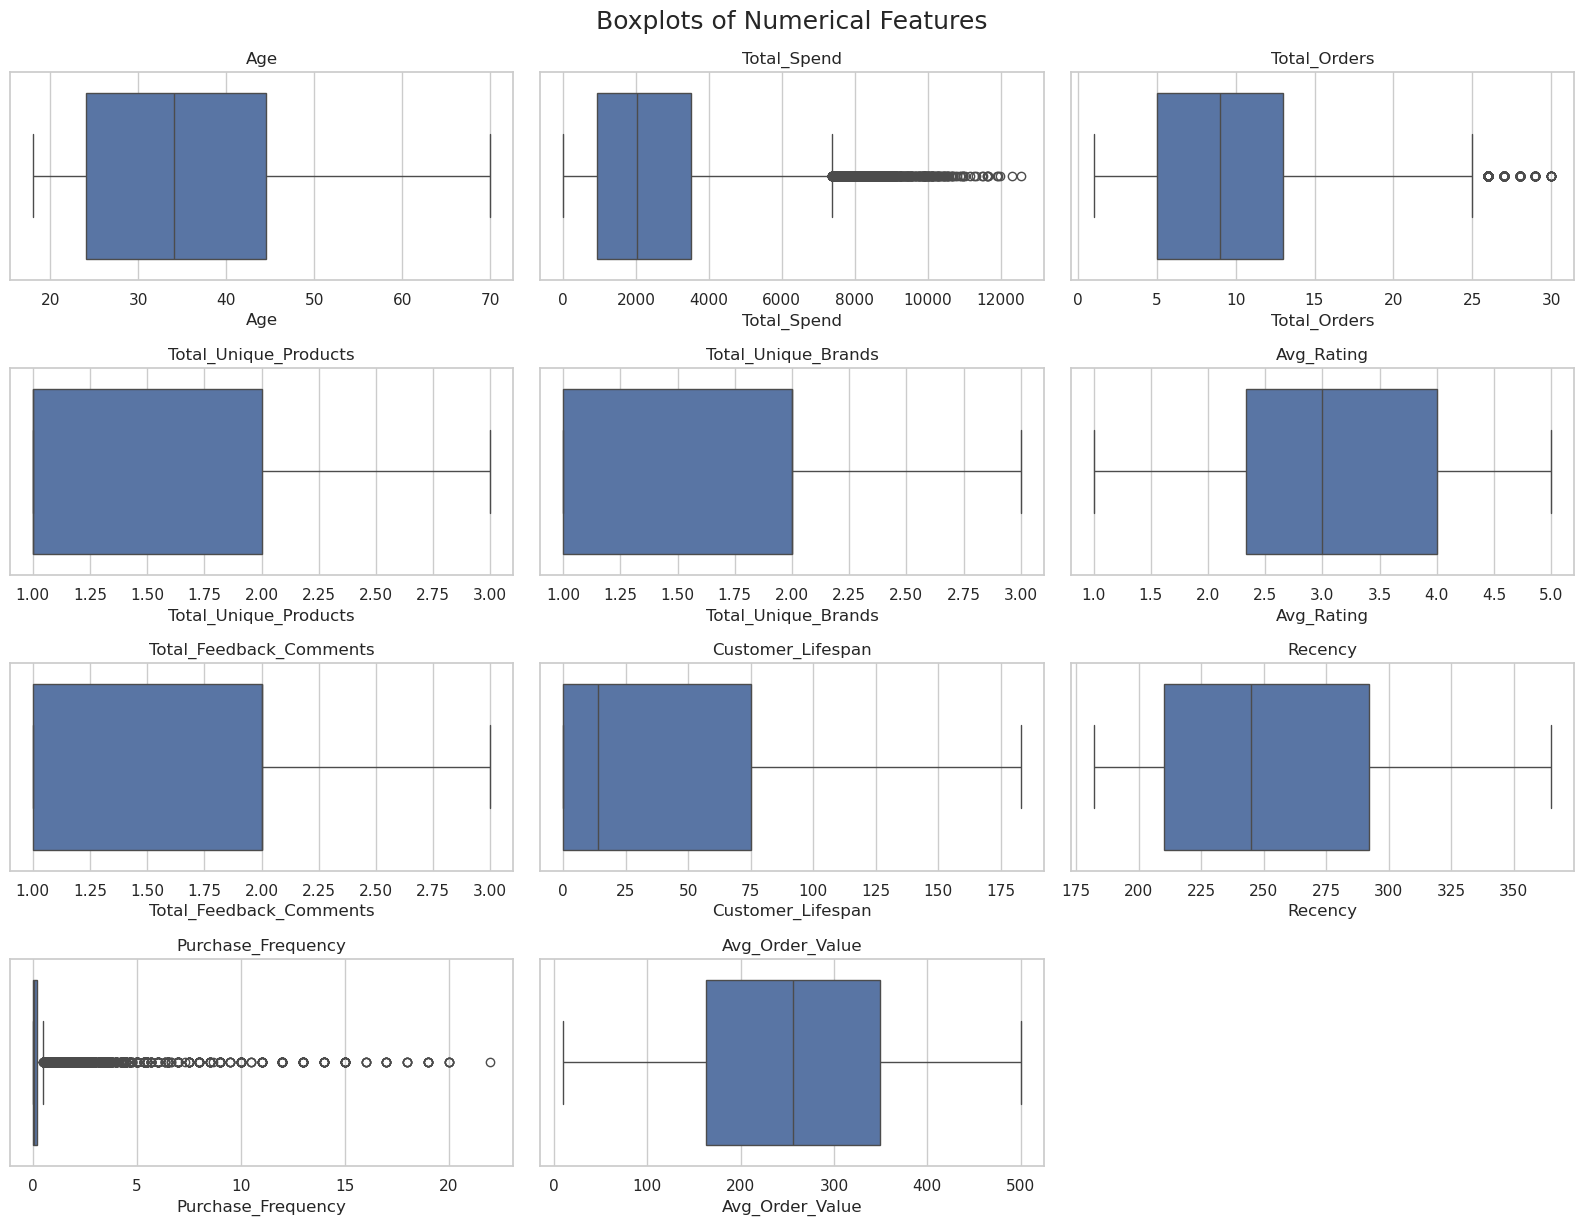

In [32]:
# Set the plot style
sns.set(style="whitegrid")

# Create a grid of boxplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_vars, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=X_train[col])
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Boxplots of Numerical Features', fontsize=18, y=1.02)
plt.show()

The boxplots reveal several numerical features with outliers as Total_Spend, Total_Orders, and Purchase_Frequency, where long right tails indicate a small group of customers who spend or order significantly more than average. In contrast, features like Age, Recency, and Avg_Rating appear more symmetrically distributed. However, since the goal is customer segmentation, these outliers are likely to represent important customer subgroups and should not be excluded from the analysis.

### 7.2 Correlation Analysis

Since we have already developed a comprehensive understanding of the data distribution through exploratory analysis, we now proceed with a correlation analysis.

Checking the correlation among features is important for the context of clustering (e.g. k-means) and prediction modelling for several reasons:
- 1. **Feature redundancy:** if two or more features are higlhy correlated, they may be capturing similar information. Including all of them in the model can lead to redundancy and potentially harm its performance.
- 2. **Multicollinearity:** highly correlated features can cause multicollinearity issues in linear models, leading to unstable estimates of coefficients and inflated variance.
- 3. **K-means clustering:** correlated features can affect the quality of clusters produced by k-means as its algorithm may give more weights to those features, impacting the clustering.

Therefore, we check the correlation among features, as shown below, based on the reasons mentioned above.

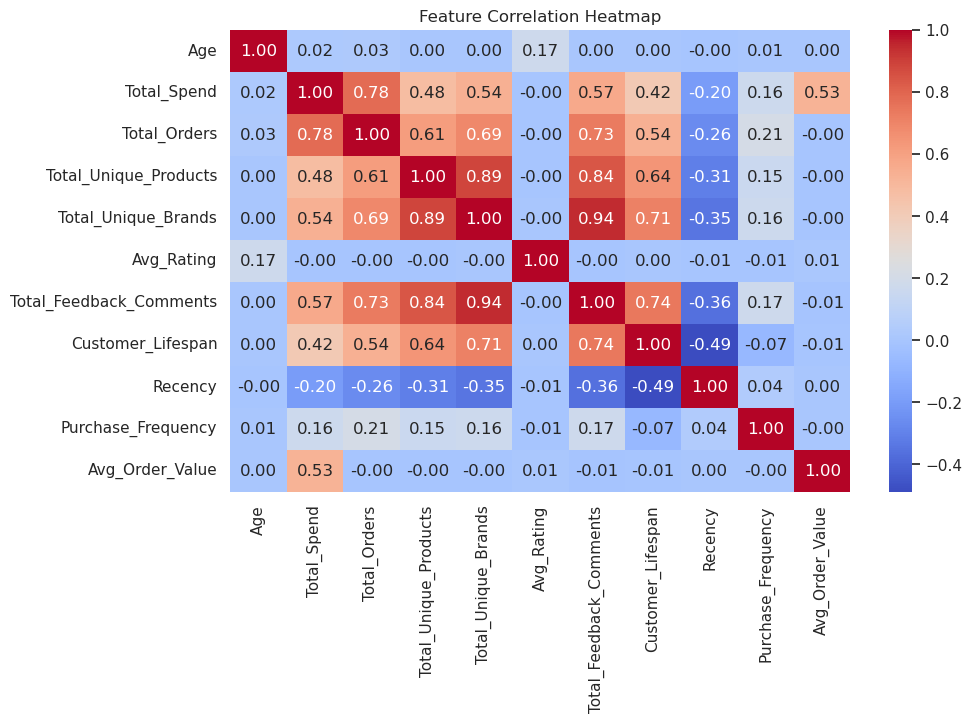

In [33]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train[numerical_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

As we can observe in the correlation heatmap above the Highly correlated group are:
Total_Spend, Total_Orders, Total_Unique_Products, Total_Unique_Brands, Total_Feedback_Comments, Recency and Customer_Lifespan all have pairwise correlations ≥ 0.5, some as high as 0.94. They're largely capturing overall customer activity/tenure.

On otherhand, the Low-correlation features are:
- Age (~0 with almost everything)
- Avg_Rating (very low correlations)
- Purchase_Frequency (orthogonal to most spend metrics)
- Avg_Order_Value (mostly independent of order counts)

Nevertheless, removing correlated features can simplify the analysis, but it's important to consider whether the removed features contain any unique information not captured by the remaining features.

## 8. Customer Segmentation

An important step before constructing our bidding model is performing customer segmentation. We aim to efficiently group customers into distinct categories based on factors such as total spend, total orders, and other relevant metrics. This segmentation may improve the CLV prediction making the bidding strategy more accurate, ultimately helping to maximize ad performance while minimizing costs.

### 8.1 PCA for dimesionality reduction

PCA is a common dimensionality reduction technique that transforms correlated features into a set of uncorrelated principal components, preserving the most variance in the data. For our case, we applied PCA in the numerical features as categorical variables don't have natural ordering or distance, which can make it difficult for PCA to interpret and transform them meaningfully.

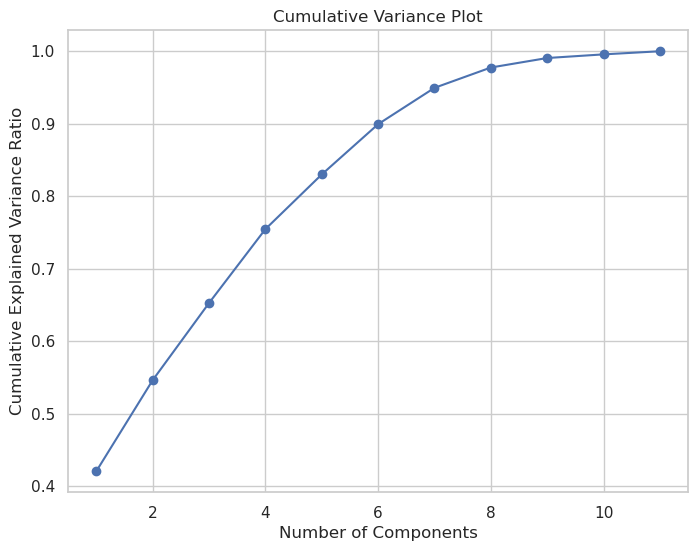

In [34]:
# Perform PCA
pca = PCA(n_components=None)
pca.fit(X_train_scaled_num)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative sum
cumulative_sum_variance = np.cumsum(pca.explained_variance_ratio_)
x_label_pca = range(1, len(X_train_scaled_num.columns)+1)

# Plot cumulative variance by number of components
plt.figure(figsize=(8, 6))
plt.plot(x_label_pca, cumulative_sum_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Variance Plot')
plt.show()

In [35]:
# Total number of components
print(f"The customer dataset has {len(X_train_scaled_num.columns)} components in total")

The customer dataset has 11 components in total


Eyebowling the chart, we can observe that 5 components can explain 90% of the variance and reduces the number of features by more than half. So we move forward with 5 components for K-means clustering.

### 8.2 K-means for clustering

After we decided the number of components, we use K-means clustering for customer segmentation. K-means clustering is a popular unsupervised machine learning algorithm used to group similar data points into clusters, aiming to minimize the distance between data points and their assigned cluster centers (centroids). Moreover, it's easy to interpret, fast and efficient. Therefore, we decided to use K-means as our clustering method.

In [36]:
def run_kmeans(df, k_range=range(2, 6), random_state=42):
    """
    Run KMeans (MiniBatchKMeans) for different values of k,
    calculate inertia and silhouette scores, and plot results.

    Parameters:
    - df: DataFrame, the dataset to cluster (should be pre-processed e.g., PCA, scaled, etc.)
    - k_range: range, the range of cluster numbers (default: 2 to 5)
    - random_state: int, the random seed for reproducibility

    Plots:
    - inertial vs k_range
    - silhouette_scores vs k_range
    """
    inertia = []
    silhouette_scores = []
    kmeans_models = []

    # Calculate inertia and silhouette scores for each k
    for k in k_range:
        kmeans = MiniBatchKMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(df)

        # Inertia (sum of squared distances to the nearest cluster center)
        inertia.append(kmeans.inertia_)

        # Silhouette Score
        score = silhouette_score(df, kmeans.labels_)
        silhouette_scores.append(score)
        print(f'Silhouette Score for {k} Clusters: {score:.4f}')

        kmeans_models.append(kmeans)

    # Create subplots for visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Inertia Plot (Elbow Method)
    axes[0].plot(k_range, inertia, marker='o')
    axes[0].set_title("Elbow Method (Inertia)")
    axes[0].set_xlabel("Number of Clusters (k)")
    axes[0].set_ylabel("Inertia (Sum of Squared Distances)")

    # Silhouette Score Plot
    axes[1].plot(k_range, silhouette_scores, marker='o', color='green')
    axes[1].set_title("Silhouette Score")
    axes[1].set_xlabel("Number of Clusters (k)")
    axes[1].set_ylabel("Silhouette Score")

    plt.tight_layout()
    plt.show()


#### 8.2.1 Using PCA

Silhouette Score for 2 Clusters: 0.3474
Silhouette Score for 3 Clusters: 0.2490
Silhouette Score for 4 Clusters: 0.1813
Silhouette Score for 5 Clusters: 0.2160


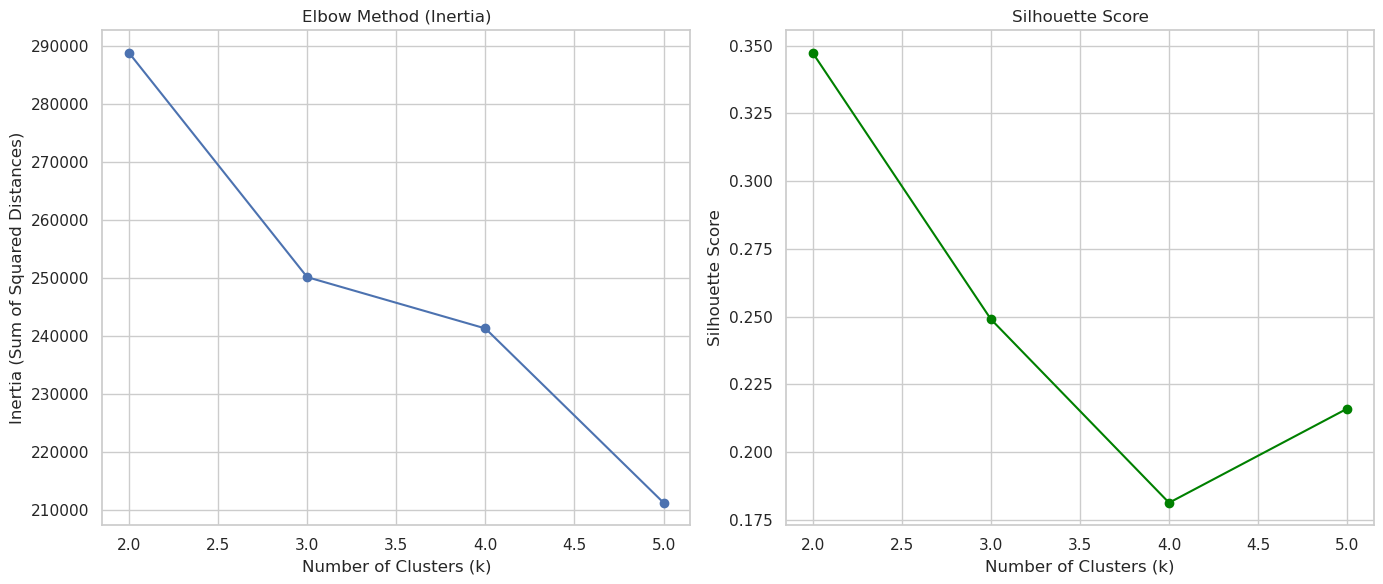

CPU times: user 2min 29s, sys: 31.8 s, total: 3min 1s
Wall time: 1min 3s


In [37]:
%%time

# PCA with 5 components
pca = PCA(n_components=5)
X_pca_train = pca.fit_transform(X_train_scaled_num)
X_pca_test = pca.transform(X_test_scaled_num)

run_kmeans(df=X_pca_train, k_range=range(2, 6))

However, as we can observe, as the number of clusters increase, the Sillhouette score is low which is not a good sign. This indicates that we don't have a well seprated clusters. Therefore, reducing the features with PCA may not help so we can try to reducing the number of features by keeping the not correlated ones as observed in the correlation heatmap above.

#### 8.2.2 Using not correlated features

Silhouette Score for 2 Clusters: 0.1950
Silhouette Score for 3 Clusters: 0.1690
Silhouette Score for 4 Clusters: 0.1895
Silhouette Score for 5 Clusters: 0.2065


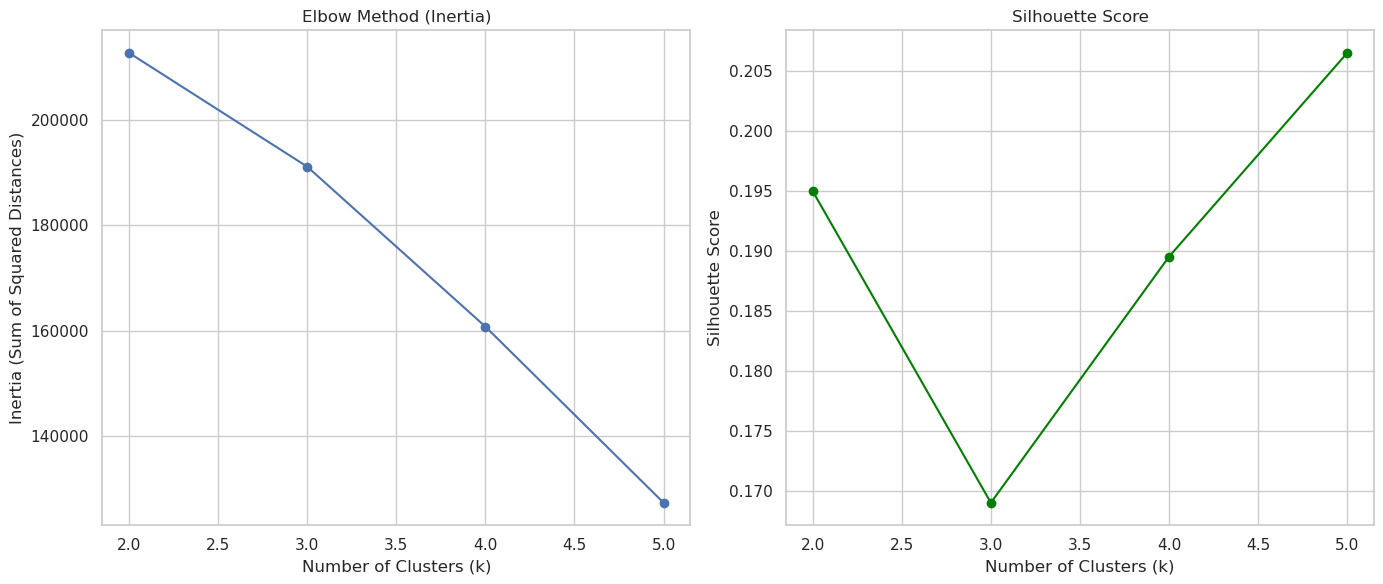

In [38]:
no_corr_cols = ['Total_Spend', 'Age', 'Avg_Rating', 'Purchase_Frequency', 'Avg_Order_Value']
#no_corr_cols = ['Total_Orders', 'Age', 'Avg_Rating', 'Avg_Order_Value']

run_kmeans(df=X_train_scaled_num[no_corr_cols], k_range=range(2, 6))

We can observe no improvement in the Silhoutte scores so we also try clustering customers using Recency, Frequency and Monetary (RFM) features as shown below.

### 8.2.3 Using RFM

Silhouette Score for 2 Clusters: 0.3336
Silhouette Score for 3 Clusters: 0.3713
Silhouette Score for 4 Clusters: 0.3899
Silhouette Score for 5 Clusters: 0.3949


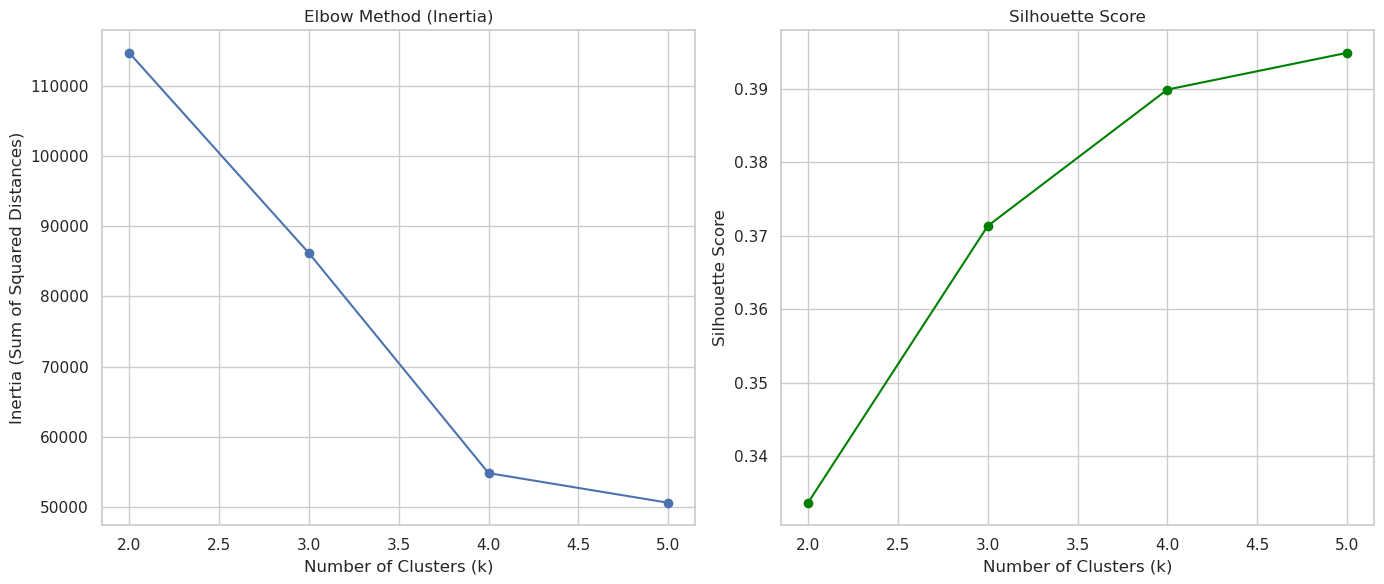

In [39]:
rfm_cols = ['Recency', 'Purchase_Frequency', 'Total_Spend']
#rfm_cols = ['Total_Orders', 'Avg_Order_Value']
run_kmeans(df=X_train_scaled_num[rfm_cols], k_range=range(2, 6))

As we can observe, when just using the RFM columns, we get better scores which indicates this might be a good strategy. Moreover, we decide to choose 3 clusters as it has one of the highest scores and it provides a simpler structure.   

### 8.3 EDA with the final clusters

After determining the appropriate metrics and the optimal number of clusters, we use this information to label our customers and perform exploratory data analysis (EDA) on the resulting segments.

In [40]:
kmeans = KMeans(n_clusters=3, random_state=random_state)
kmeans.fit(X_train_scaled_num[rfm_cols])
#kmeans.fit(X_pca_train)

# Predict cluster labels
train_clusters = kmeans.predict(X_train_scaled_num[rfm_cols])
test_clusters = kmeans.predict(X_test_scaled_num[rfm_cols])
# train_clusters = kmeans.predict(X_pca_train)
# test_clusters = kmeans.predict(X_pca_test)

# Add cluster labels to original train and test sets
X_train["Cluster_Label"] = train_clusters
X_test["Cluster_Label"] = test_clusters

# X_train_scaled_final["Cluster_Label"] = train_clusters
# X_test_scaled_final["Cluster_Label"] = test_clusters

display(X_train.head())

,Total_Orders,Total_Spend,Age,Gender,Income,Country,Product_Category,Product_Brand,Total_Unique_Products,Total_Unique_Brands,...,Total_Feedback_Comments,Transaction_Month,Shipping_Method,Payment_Method,Order_Status,Customer_Lifespan,Purchase_Frequency,Recency,Avg_Order_Value,Cluster_Label
0,9.0,225.790314,69.0,Female,High,UK,Electronics,Other,1,1,...,1,April,Express,Credit Card,Delivered,0,0.000000,193,25.087813,1
1,8.0,499.813602,23.0,Male,Medium,USA,Books,Penguin Books,1,1,...,1,April,Standard,Debit Card,Delivered,0,0.000000,324,62.476700,2
2,8.0,790.004790,67.0,Male,Medium,USA,Books,Penguin Books,1,1,...,1,August,Standard,Credit Card,Pending,0,0.000000,185,98.750599,1
3,3.0,451.867067,34.0,Male,Low,USA,Grocery,Pepsi,1,1,...,1,April,Same-Day,Debit Card,Delivered,0,0.000000,316,150.622356,2
4,14.0,3434.981026,24.0,Male,Medium,Germany,Clothing,IKEA,3,3,...,3,April,Same-Day,Cash,Delivered,37,0.378378,289,245.355788,2


In [41]:
# Convert arrays to DataFrames
train_clusters_df = pd.DataFrame(train_clusters, columns=['Cluster_Label'], index=X_train.index)
test_clusters_df = pd.DataFrame(test_clusters, columns=['Cluster_Label'], index=X_test.index)

# One-hot encode
train_cluster_onehot = pd.get_dummies(train_clusters_df['Cluster_Label'], prefix='Cluster_Label', dtype=int, drop_first=True)
test_cluster_onehot = pd.get_dummies(test_clusters_df['Cluster_Label'], prefix='Cluster_Label', dtype=int, drop_first=True)

# Concatenating final train and test sets with clusters
X_train_scaled_final = pd.concat([X_train_scaled_final, train_cluster_onehot], axis=1)
X_test_scaled_final = pd.concat([X_test_scaled_final, test_cluster_onehot], axis=1)
X_train_scaled_final.head()


,Age,Total_Spend,Total_Orders,Total_Unique_Products,Total_Unique_Brands,Avg_Rating,Total_Feedback_Comments,Customer_Lifespan,Recency,Purchase_Frequency,...,Shipping_Method_Same-Day,Shipping_Method_Standard,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Order_Status_Pending,Order_Status_Processing,Order_Status_Shipped,Cluster_Label_1,Cluster_Label_2
0,2.690907,-1.190388,-0.079340,-0.867443,-0.948922,1.672952,-0.994531,-0.816349,-1.204932,-0.281748,...,0,0,1,0,0,0,0,0,1,0
1,-0.996301,-1.041409,-0.257436,-0.867443,-0.948922,-0.150807,-0.994531,-0.816349,1.396299,-0.281748,...,0,1,0,1,0,0,0,0,0,1
2,2.530593,-0.883639,-0.257436,-0.867443,-0.948922,-1.062686,-0.994531,-0.816349,-1.363786,-0.281748,...,0,1,1,0,0,1,0,0,1,0
3,-0.114577,-1.067476,-1.147921,-0.867443,-0.948922,0.761073,-0.994531,-0.816349,1.237445,-0.281748,...,1,0,0,1,0,0,0,0,0,1
4,-0.916144,0.554363,0.811145,2.182993,1.788795,0.153153,1.627790,-0.061170,0.701314,0.138513,...,1,0,0,0,0,0,0,0,0,1


We can observe below that each cluster has a different median CLV which indicates clustering may be useful for improving CLV prediction.

,Total_Orders,Total_Spend,Age,Gender,Income,Country,Product_Category,Product_Brand,Total_Unique_Products,Total_Unique_Brands,...,Transaction_Month,Shipping_Method,Payment_Method,Order_Status,Customer_Lifespan,Purchase_Frequency,Recency,Avg_Order_Value,Cluster_Label,CLV_6M
0,9.0,225.790314,69.0,Female,High,UK,Electronics,Other,1,1,...,April,Express,Credit Card,Delivered,0,0.000000,193,25.087813,1,670.649906
1,8.0,499.813602,23.0,Male,Medium,USA,Books,Penguin Books,1,1,...,April,Standard,Debit Card,Delivered,0,0.000000,324,62.476700,2,490.795359
2,8.0,790.004790,67.0,Male,Medium,USA,Books,Penguin Books,1,1,...,August,Standard,Credit Card,Pending,0,0.000000,185,98.750599,1,1169.877135
3,3.0,451.867067,34.0,Male,Low,USA,Grocery,Pepsi,1,1,...,April,Same-Day,Debit Card,Delivered,0,0.000000,316,150.622356,2,0.000000
4,14.0,3434.981026,24.0,Male,Medium,Germany,Clothing,IKEA,3,3,...,April,Same-Day,Cash,Delivered,37,0.378378,289,245.355788,2,0.000000


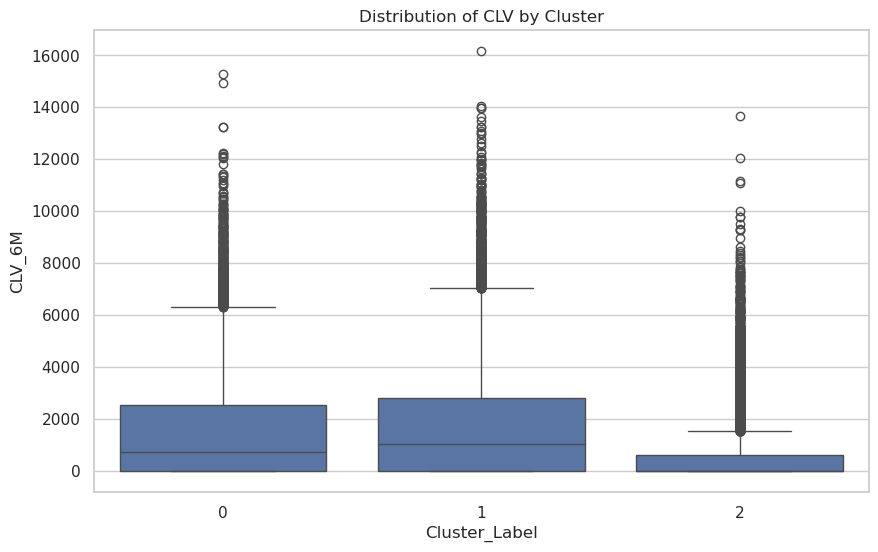

In [42]:
# Concatenate train set for analysis
train_df = pd.concat([X_train, y_train], axis=1)
display(train_df.head())

# Example for `CLV` by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_Label', y='CLV_6M', data=train_df)
plt.title('Distribution of CLV by Cluster')
plt.show()

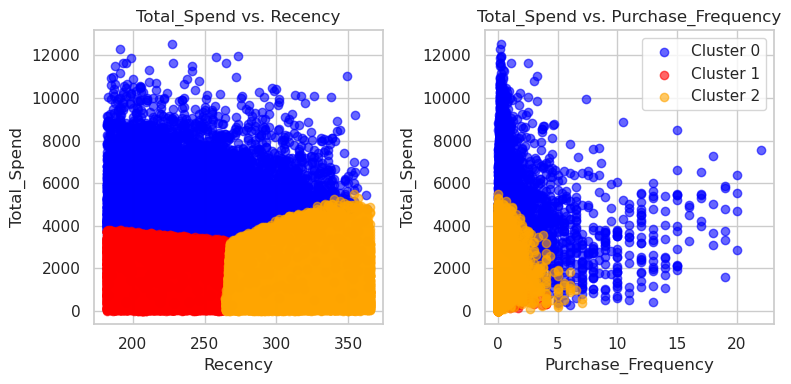

In [43]:
import matplotlib.pyplot as plt

# Define the relevant columns to compare (Recency, Purchase_Frequency, Total_Spend)
plots = [
    ('Recency', 'Total_Spend'),
    ('Purchase_Frequency', 'Total_Spend')
]

# Pick colors for each cluster
colors = {0: 'blue', 1: 'red', 2: 'orange'}

# Create the subplots with 2 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

# Loop over each subplot and create the scatter plots for the cluster comparisons
for ax, (x_col, y_col) in zip(axes, plots):
    for cluster, color in colors.items():
        dfc = train_df[train_df['Cluster_Label'] == cluster]
        ax.scatter(
            dfc[x_col], dfc[y_col],
            c=color, label=f'Cluster {cluster}', alpha=0.6
        )
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{y_col} vs. {x_col}')
    ax.grid(True)

# Create a shared legend in the bottom-right subplot
axes[-1].legend(loc='upper right')

# Adjust the layout so labels and titles don't overlap
plt.tight_layout()
plt.show()


As we can observe, we ended up by having the same number of clusters of the initial `customer_segment` column given in the dataset. Moreover, it makes more or less sense the named labels given, originally, which are:
- `New`, corresponding to Cluster 1 (New buyers)
- `Regular`, corresponding to Cluster 2 (Buyers who purchase frequently)
- `Premium`, corresponding to Cluster 0 (Buyers who more purchase frequently and spend the most)

## 9. Customer Lifetime Value Prediction Models

### 9.1 Baseline model - Multilinear regression

We need to predit the Customer Lifetime Value (CLV) as accurately as possible as this will form the foundation for more intelligent bidding decisions we explain later in the code. We'll start with a Multilinear regression model which will serve as a baseline. Multilinear regression is a fast, simple, and interpretable model that assumes a linear relationship between inputs and outputs. It is ideal as a baseline because it’s easy to train, helps spot basic data issues, and sets a performance benchmark. However, it struggles with complex, nonlinear patterns, is sensitive to outliers, and requires careful feature scaling.

Under the section "Towards the final model", we'll improve it by implementing more complex models as Neural networks with the goal to reach higher performances.

Once we defined the baseline model, we train the model on the train set with Cross-validation (CV) and assees perfomance using R2 as metric. As saw on CS1090a, Cross-validation R2 is a good metric because it shows how well a model generalizes to unseen data. It measures the proportion of variance explained by the model, and by averaging R2 across folds, we can get a more reliable estimate, avoiding overfitting on one lucky split. It also makes fair comparisons between models by testing them under the same conditions on multiple subsets of the data.

The CV R2 set will be used to compare models' performance, to test the Value-based bidding and as validation in the Neural network models. Last but not least, the test set will be used only for final comparison to decide our final model.  

Before moving to the modelling part, we check the Variance Inflation Factor (VIF) which is a classic way to detect multicollinearity between features in regression. It tells us how much a feature's variance is inflated due to its correlation with other features. If VIF is higher than 10 is likely a multicollinearity issue and we need to remove the feature.

In [44]:
# Function to get model's performance
def get_performance_metrics(model, X_train, y_train, kf, n_jobs):
    # Perform cross-validation for MSE and R2

    scores = cross_validate(
        model,
        X_train,
        y_train,
        cv=kf,
        n_jobs=n_jobs,
        scoring=["neg_mean_squared_error", "r2"],
    )

    # Calculate the average CV metrics
    cv_mean_mse = -1 * np.mean(scores["test_neg_mean_squared_error"])
    cv_r2_mean = np.mean(scores["test_r2"])

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predictions on train set
    y_train_pred = model.predict(X_train)

    # Calculate Train and Test MSE and R2
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    print("Train MSE:", round(train_mse, 4))
    print("Mean CV MSE:", round(cv_mean_mse, 4))
    print("Train R^2:", round(train_r2, 4))
    print("Mean CV R^2:", round(cv_r2_mean, 4))

    return {
        "train_mse": train_mse,
        "cv_mean_mse": cv_mean_mse,
        "train_r2": train_r2,
        "cv_r2_mean": cv_r2_mean,
    }

# Setting up some common variables
random_state = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
n_jobs = -1
n_estimators = 30

In [45]:
# Calculate VIF for each feature
vif_df = pd.DataFrame()
vif_df["Feature"] = X_train_scaled_final.columns
vif_df["VIF"] = [variance_inflation_factor(X_train_scaled_final.values, i) for i in range(X_train_scaled_final.shape[1])]

# Sort by VIF descending (excluding the constant)
vif_df = vif_df[vif_df["Feature"] != "const"].sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_df.loc[vif_df['VIF'] >= 10])

                   Feature        VIF
0      Total_Unique_Brands  13.250923
1  Total_Feedback_Comments  11.888236
2              Total_Spend  11.560548


In [46]:
# Drop columns with VIF >= 10.
# We decided to not drop Total Spend as it's part of the CLV calculation and it might be a good predictor.
col_vif_to_drop = ["Total_Spend", "Total_Unique_Brands", "Total_Feedback_Comments"]
X_train_scaled_final = X_train_scaled_final.drop(columns=col_vif_to_drop)
X_test_scaled_final = X_test_scaled_final.drop(columns=col_vif_to_drop)
X_train_scaled_final.head()

,Age,Total_Orders,Total_Unique_Products,Avg_Rating,Customer_Lifespan,Recency,Purchase_Frequency,Avg_Order_Value,Gender_Male,Income_Low,...,Shipping_Method_Same-Day,Shipping_Method_Standard,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Order_Status_Pending,Order_Status_Processing,Order_Status_Shipped,Cluster_Label_1,Cluster_Label_2
0,2.690907,-0.079340,-0.867443,1.672952,-0.816349,-1.204932,-0.281748,-1.899774,0,0,...,0,0,1,0,0,0,0,0,1,0
1,-0.996301,-0.257436,-0.867443,-0.150807,-0.816349,1.396299,-0.281748,-1.592002,1,0,...,0,1,0,1,0,0,0,0,0,1
2,2.530593,-0.257436,-0.867443,-1.062686,-0.816349,-1.363786,-0.281748,-1.293408,1,0,...,0,1,1,0,0,1,0,0,1,0
3,-0.114577,-1.147921,-0.867443,0.761073,-0.816349,1.237445,-0.281748,-0.866419,1,1,...,1,0,0,1,0,0,0,0,0,1
4,-0.916144,0.811145,2.182993,0.153153,-0.061170,0.701314,0.138513,-0.086607,1,0,...,1,0,0,0,0,0,0,0,0,1


In [47]:
# Calculate VIF for each feature
vif_df = pd.DataFrame()
vif_df["Feature"] = X_train_scaled_final.columns
vif_df["VIF"] = [variance_inflation_factor(X_train_scaled_final.values, i) for i in range(X_train_scaled_final.shape[1])]

# Sort by VIF descending (excluding the constant)
vif_df = vif_df[vif_df["Feature"] != "const"].sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_df.loc[vif_df['VIF'] >= 10])

Empty DataFrame
Columns: [Feature, VIF]
Index: []


In [48]:
# Apply the log transformation, log(x + 1), in the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [49]:
# Initialize the model
baseline_model = LinearRegression()

# Get performance metrics for the baseline model
perf_baseline = performance_metrics_baseline = get_performance_metrics(
    baseline_model, X_train_scaled_final, y_train_log, kf, n_jobs
)

Train MSE: 11.2584
Mean CV MSE: 11.2864
Train R^2: 0.1783
Mean CV R^2: 0.1762


In [50]:
# Run regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train_scaled_final, y_train_log)

# Get CLV log predictions and transform it back to CLV
clv_log_preds_train = baseline_model.predict(X_train_scaled_final)
clv_preds_train = np.expm1(clv_log_preds_train)

# Get model's perfromance on train
mse = mean_squared_error(y_train_log, clv_log_preds_train)
r2 = r2_score(y_train_log, clv_log_preds_train)

print(f"Mean Squared Error on Train set: {mse:.4f}")
print(f"R2 Score on Train set: {r2:.4f}")

Mean Squared Error on Train set: 11.2584
R2 Score on Train set: 0.1783


As we can observe, the CV R2 is approximately 18%, so our baseline model explains only 18% of the CLV variance. We'll work towards increasing model complexity in order to increase perfromance in the next steps, as CLV is hard to predict because customer behavior is noisy, nonlinear, and often changes unpredictably over time.

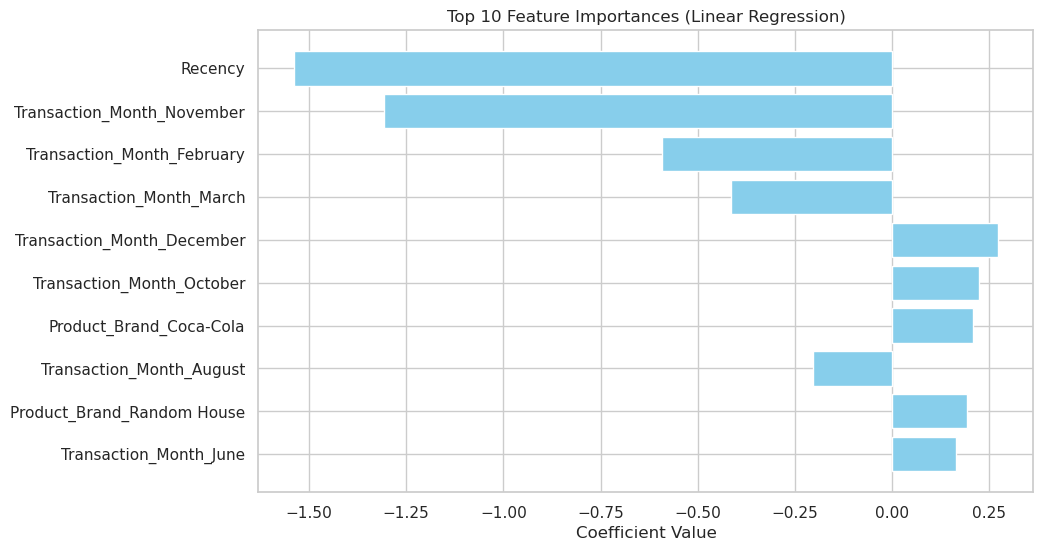

In [51]:
# Get the coefficients and corresponding feature names
coefficients = baseline_model.coef_
feature_names = X_train_scaled_final.columns

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled_final.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of coefficients in descending order
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Select the top 10 features
top_10_features = feature_importance.head(10)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Importances (Linear Regression)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

The chart clearly shows the top 10 most influential features for predicting Customer Lifetime Value (CLV) based on the coefficients from the linear regression model. The length of the bars represents the magnitude of each feature's coefficient. We can observe the recency has a negative coefficient which might indicate that customers with more recent activity tend to have lower CLV predictions.

Next we check the linearity assumptions in regression analysis to ensure that the model’s predictions are accurate and that the relationships between variables are interpreted correctly. These assumptions are related to the structure of the data and the behavior of residuals, which are the differences between observed and predicted values.

The key assumptions are as follows:

- Linearity of the Relationship: There must be a linear relationship between the independent variables (features) and the dependent variable (target). We evaluate this assumption by creating an Actual vs. Predicted plot. Ideally, the points should form a diagonal line which is not the case for our model as we can see in the chart on the left, below.

- Independence of Residuals: The residuals should be independent of each other. This is especially important in time-series analysis, but in our case, the time-related variables are categorical, so this assumption holds.

- Homoscedasticity (Constant Variance of Residuals): The variance of the residuals should remain constant across all levels of the fitted values. We can assess this by plotting Residuals vs. Fitted Values. The residuals should be randomly scattered around zero which it might not be in the case of our model when looking at the middle chart below

- Normality of Residuals: The residuals should be normally distributed. To check this, we  generate a Histogram of Residuals, which should ideally resemble a bell-shaped curve. In our case, it might not be normal as the bell-shaped curve seems to be shifted to the right.

The violations of these assumptions don't necessarily mean the model is unusable, but they do indicate that further investigation or adjustments are required to improve the model's performance and reliability.

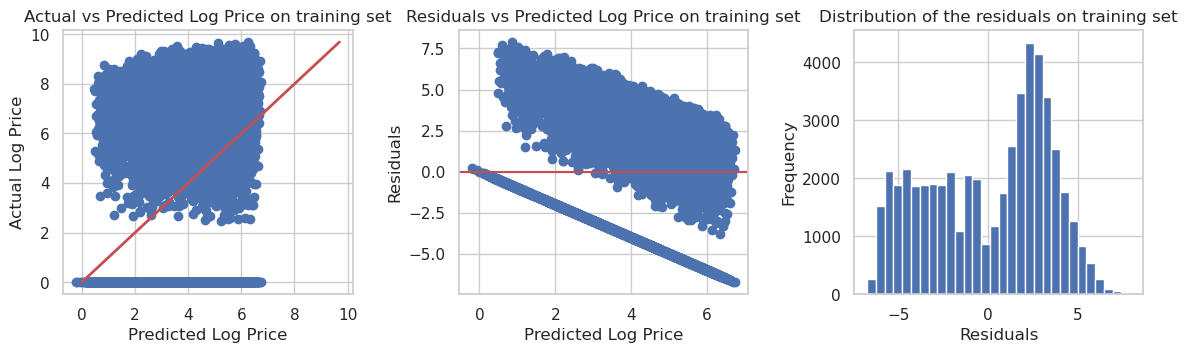

In [52]:
# Get predictions and residuals
residuals = y_train_log - clv_log_preds_train

# Create a grid of axes
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot actual vs predictors on training set to check linearity
ax[0].scatter(clv_log_preds_train, y_train_log)
ax[0].plot([y_train_log.min(), y_train_log.max()], [y_train_log.min(), y_train_log.max()], "r", lw=2)
ax[0].set_ylabel("Actual Log Price")
ax[0].set_title("Actual vs Predicted Log Price on training set")
ax[0].set_xlabel("Predicted Log Price")

# Plot the residuals vs predicted values on training set to check Homoscedasticity
ax[1].scatter(clv_log_preds_train, residuals)
ax[1].axhline(0, c="r")
ax[1].set_ylabel("Residuals")
ax[1].set_title("Residuals vs Predicted Log Price on training set")
ax[1].set_xlabel("Predicted Log Price")

# Plot the residuals on the training set to check Normality of Residuals
ax[2].hist(residuals, bins=30)
ax[2].set_ylabel("Frequency")
ax[2].set_xlabel("Residuals")
ax[2].set_title("Distribution of the residuals on training set")

# Avoid overlap between title and x-axis
plt.tight_layout(pad=2.0)
plt.show()


### 9.2 Towards the Final model - Random Forest Regression

As our goal is to reach the highest model's perfomance as possible, in this section we work towards the final model trying different models by increasing model's complexity. For milestone 4 we'll test Random Forest and some configurations of Feed-Foward Neural Network for initial tests. In the Milestone 5 we'll test different models to decide our final best model.

As saw in Harvard CS1090A, Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs to improve accuracy and reduce overfitting. In regression, it averages the predictions from individual trees. It's a powerful machine learning model with the main features as explained below.

Ensemble of Decision Trees: Builds many decision trees using random subsets of data and features.
Bootstrap Aggregating (Bagging): Each tree is trained on a bootstrapped (randomly sampled) subset of the data.
Random Feature Selection: Each tree uses a random subset of features to split the data, reducing correlation between trees.

Pros:
- Handles Non-Linearity: Can model complex relationships without requiring linearity assumptions.
- Robust to Overfitting: Aggregates predictions from many trees, reducing the risk of overfitting compared to individual decision trees.

Cons:
- Model Interpretability: While decision trees are interpretable, Random Forests are often considered "black boxes" due to the large number of trees.
- Computationally Expensive: Training multiple trees on large datasets can be resource-intensive and slow, especially with a high number of trees.

We use a technique of grid search called [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html) to test some model parameters and get the ones with the best model's performance. As we can see in the documentation, the advantage of this method is that the search strategy starts evaluates all the candidates with a small amount of resources and iteratively selects the best candidates, using more and more resources.


In [53]:
%%time
# Random Forest parameter grid
rf_param_grid = {
    'n_estimators': [100, 400, 700, 1000, 2000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Random Forest Halving Search
rf_search = HalvingRandomSearchCV(
    RandomForestRegressor(random_state=random_state),
    rf_param_grid,
    scoring='neg_mean_squared_error',
    random_state=random_state,
    cv=kf,
    n_jobs=-1
)

rf_search.fit(X_train_scaled_final, y_train_log)
best_rf = rf_search.best_estimator_
print("Best RF Params:", rf_search.best_params_)

/shared/courseSharedFolders/142601outer/142601/cs109b/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 60 is smaller than n_iter=5169. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best RF Params: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}
CPU times: user 39.8 s, sys: 267 ms, total: 40.1 s
Wall time: 1min 20s


In [54]:
# Get performance
perf_rf = get_performance_metrics(best_rf, X_train_scaled_final, y_train_log, kf, n_jobs)

Train MSE: 2.3283
Mean CV MSE: 11.6174
Train R^2: 0.8301
Mean CV R^2: 0.152


In [55]:
# Get CLV log predictions and transform it back to CLV
clv_log_preds_train_rf = best_rf.predict(X_train_scaled_final)
clv_preds_train_rf = np.expm1(clv_log_preds_train_rf)

# Get model's perfromance on train
mse_rf = mean_squared_error(y_train_log, clv_log_preds_train_rf)
r2_rf = r2_score(y_train_log, clv_log_preds_train_rf)

print(f"Mean Squared Error on Train set: {mse_rf:.4f}")
print(f"R2 Score on Train set: {r2_rf:.4f}")

Mean Squared Error on Train set: 2.3283
R2 Score on Train set: 0.8301


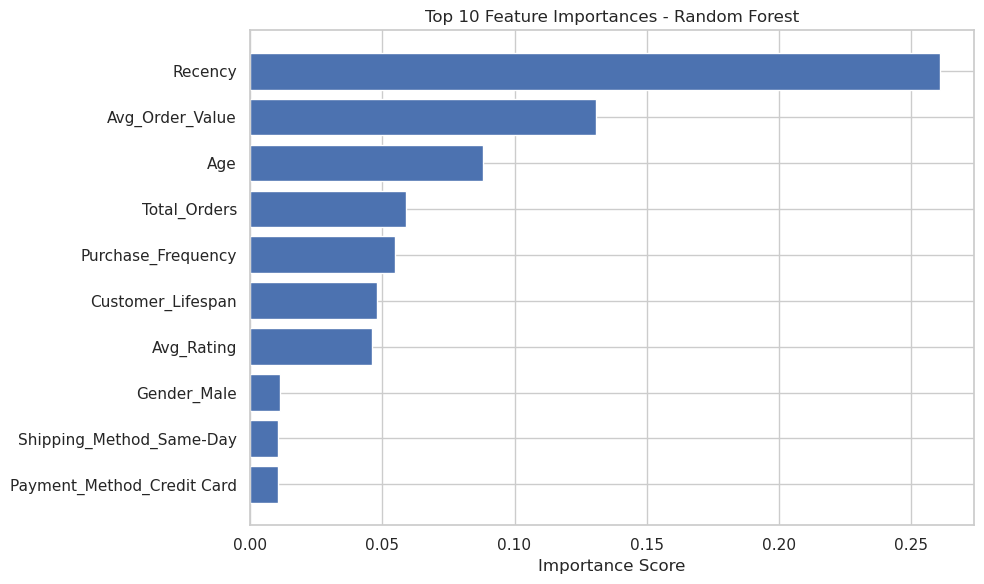

In [56]:
# Get feature importances
importances = best_rf.feature_importances_
features = X_train_scaled_final.columns  # Make sure this is a DataFrame, not NumPy

# Create DataFrame for easier visualization
feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_importance_df['Feature'][:10], feat_importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

Looking at the performance metrics of the model, we can observe that the Random Forest model has a a CV R2 of 15% which a slightly lower than the one obtained with the Baseline model higlighting the hard task to predict future CLV. Moreover, the most important features to predict CLV are Recency, Avg Order Value, Age and Total orders, for example.

### 9.3 Towards the Final model - Neural Networks

Neural networks are increasingly used to predict Customer Lifetime Value (CLV) because they are excellent at modeling complex, nonlinear relationships between customer features and spending behavior.
They automatically learn feature interactions, scale well with large data, and can handle rich input data (such as transactions, demographics, etc.) as you can see for example on [A Deep Probabilistic Model for Customer Lifetime Value Prediction](https://research.google/pubs/a-deep-probabilistic-model-for-customer-lifetime-value-prediction/).

However, they also have drawbacks: they require lots of data, are often seen as black boxes (low interpretability), take longer to train, and risk overfitting if not carefully regularized (e.g., with dropout, early stopping) as we saw throughout the CS1090b course at Harvard.

Below we test some architectures as initial step to also help us to prepare the pipeline for futures interactions. We plot the number of epochs vs. R2 score to help us visualize model'l performance in each interaction and see if there sign of overfitting.

#### 9.3.1 Using the orginal columns from train set as input

In [57]:
def plot_hist(history, title=None):
    # Create a range of epoch numbers
    epochs = range(len(history.history['loss']))

    fig, axs = plt.subplots(2, 1, figsize=(12, 10))

    # 1. Plot Train and Validation Loss
    axs[0].plot(epochs, history.history['loss'], label='Train Loss')
    axs[0].plot(epochs, history.history['val_loss'], label='Validation Loss')
    best_val_loss = np.nanmin(history.history['val_loss'])
    axs[0].axvline(np.nanargmin(history.history['val_loss']),
                   c='k', ls='--',
                   label=f'Best Val Loss = {best_val_loss:.4f}')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('MSE Loss')
    axs[0].set_title('Training vs Validation Loss')
    axs[0].legend()
    axs[0].grid(True)

    # 2. Plot Train and Validation R2
    axs[1].plot(epochs, history.history['r2_score'], label='Train R2')
    axs[1].plot(epochs, history.history['val_r2_score'], label='Validation R2')
    best_val_r2 = np.nanmax(history.history['val_r2_score'])
    axs[1].axvline(np.nanargmax(history.history['val_r2_score']),
                   c='k', ls='--',
                   label=f'Best Val R2 = {best_val_r2:.4f}')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('R2 Score')
    axs[1].set_title('Training vs Validation R2')
    axs[1].legend()
    axs[1].grid(True)

    if title:
        plt.suptitle(title)

    plt.tight_layout()
    plt.show()

In [58]:
def create_dynamic_nn(input_dim, layer_sizes, dropout_rate=0.3):
    """
    Create a dynamic neural network model.

    Parameters:
    - input_dim: Number of features (input dimensions).
    - layer_sizes: List of integers, each representing the size of each layer (number of neurons).
    - dropout_rate: Dropout rate to use between layers to prevent overfitting. Default is 0.3.

    Returns:
    - model: Compiled Keras model.
    """
    model = models.Sequential()

    # Input layer
    model.add(layers.Input(shape=(input_dim,)))

    # Add hidden layers dynamically based on layer_sizes
    for size in layer_sizes:
        model.add(layers.Dense(size, activation='relu'))
        model.add(layers.Dropout(dropout_rate))  # Dropout layer for regularization

    # Output layer (for regression task, LTV prediction)
    model.add(layers.Dense(1))  # Single output neuron for regression (continuous value)

    # Compile the model
    # Get R2Score tip on
    # https://stackoverflow.com/questions/45250100/kerasregressor-coefficient-of-determination-r2-score#46969576
    model.compile(optimizer='adam', loss='mse', metrics=['mse', tf.keras.metrics.R2Score()])

    return model


In [59]:
# Example usage: Dynamically create a model
input_dim = X_train_scaled_final.shape[1]
layer_sizes = [64, 32]

# Build nn model
model_nn1 = create_dynamic_nn(input_dim, layer_sizes)

# Early Stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model_nn1.fit(
    X_train_scaled_final, y_train_log,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping_callback]
)

# Get CLV log predictions and transform it back to CLV
clv_log_preds_train = model_nn1.predict(X_train_scaled_final)
clv_preds_train = np.expm1(clv_log_preds_train)

# Get model's perfromance on train
mse = mean_squared_error(y_train_log, clv_log_preds_train)
r2 = r2_score(y_train_log, clv_log_preds_train)

print(f"Mean Squared Error on Train set: {mse:.4f}")
print(f"R2 Score on Train set: {r2:.4f}")

2025-05-08 16:44:05.241507: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20763 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:38:00.0, compute capability: 8.9


Epoch 1/50


2025-05-08 16:44:07.749812: I external/local_xla/xla/service/service.cc:168] XLA service 0x1512dd4eca50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-05-08 16:44:07.749846: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2025-05-08 16:44:07.754631: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-08 16:44:07.818247: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1746737048.039849   11150 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


324/324 [==============================] - 4s 3ms/step - loss: 14.8169 - mse: 14.8169 - r2_score: -0.0815 - val_loss: 11.7985 - val_mse: 11.7985 - val_r2_score: 0.1391
Epoch 2/50
324/324 [==============================] - 1s 2ms/step - loss: 12.4846 - mse: 12.4846 - r2_score: 0.0888 - val_loss: 11.6320 - val_mse: 11.6320 - val_r2_score: 0.1512
Epoch 3/50
324/324 [==============================] - 1s 2ms/step - loss: 12.2425 - mse: 12.2425 - r2_score: 0.1064 - val_loss: 11.6015 - val_mse: 11.6015 - val_r2_score: 0.1534
Epoch 4/50
324/324 [==============================] - 1s 2ms/step - loss: 12.1382 - mse: 12.1382 - r2_score: 0.1140 - val_loss: 11.5708 - val_mse: 11.5708 - val_r2_score: 0.1557
Epoch 5/50
324/324 [==============================] - 1s 2ms/step - loss: 11.9985 - mse: 11.9985 - r2_score: 0.1242 - val_loss: 11.5627 - val_mse: 11.5627 - val_r2_score: 0.1563
Epoch 6/50
324/324 [==============================] - 1s 2ms/step - loss: 11.9358 - mse: 11.9358 - r2_score: 0.1288 - va

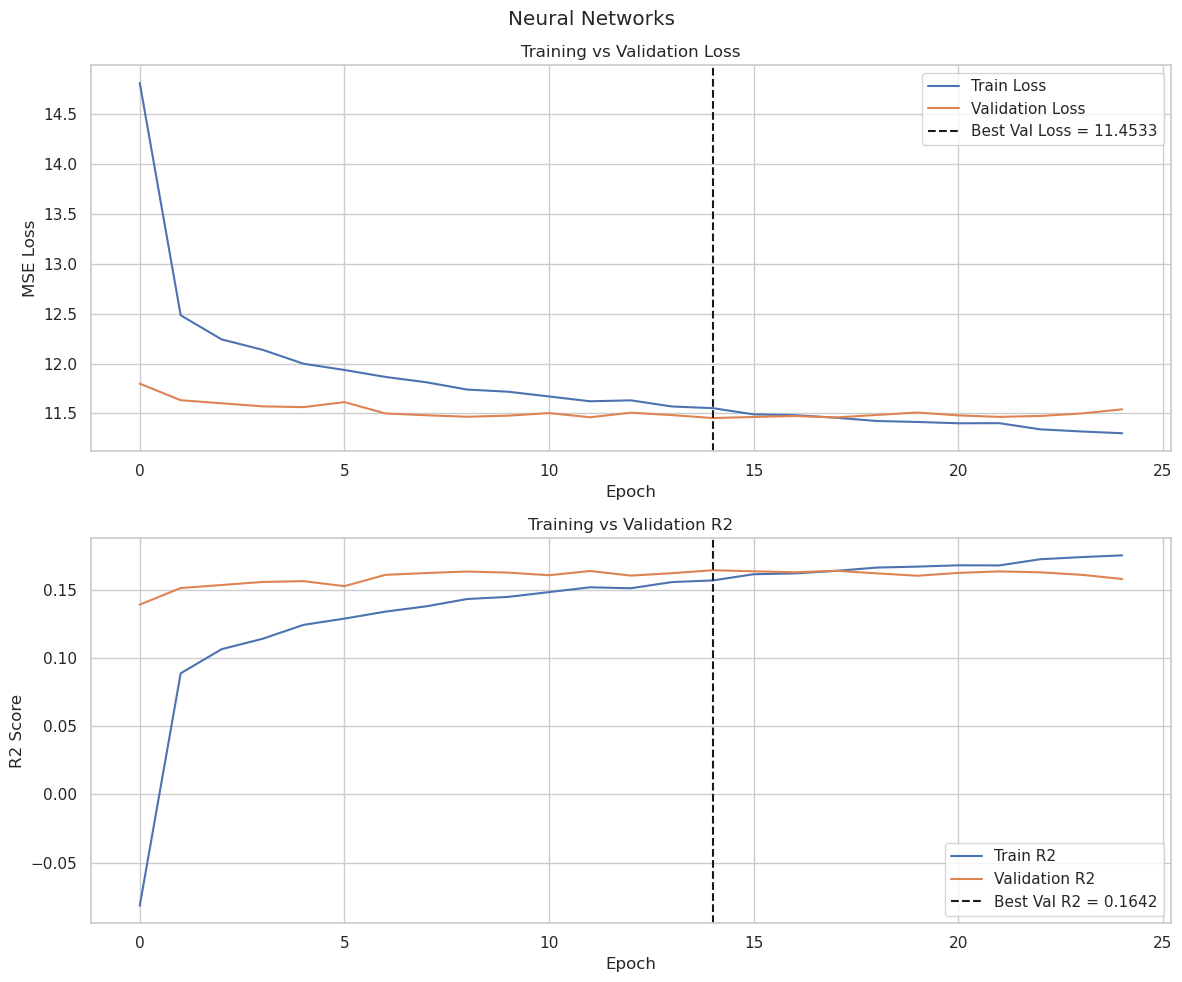

In [60]:
plot_hist(history, title="Neural Networks")

We tested two architectures based on the train set input, original and considering feature interaction. As we can see the two models we tested give a Validation R2 of approximately 16%.

#### 9.3.2 Using feature interaction as input

After building a basic neural network, we want to include feature interactions as input because they can reveal deeper patterns in customer behavior that aren’t captured by individual features alone.

In [61]:
# Initialize the PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit the transformer only on the training data
X_train_interacted = poly.fit_transform(X_train_scaled_final)
print(X_train_interacted.shape)

# Transform the test data using the same fitted transformer
X_test_interacted = poly.transform(X_test_scaled_final)

input_dim = X_test_interacted.shape[1]
layer_sizes = [32, 16, 8, 4]

model_nn2 = create_dynamic_nn(input_dim, layer_sizes)

# Train the model
history = model_nn2.fit(
    X_train_interacted, y_train_log,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping_callback]
)

# Get CLV log predictions and transform it back to CLV
clv_log_preds_train = model_nn2.predict(X_train_interacted)
clv_preds_train = np.expm1(clv_log_preds_train)

# Get model's perfromance on train
mse = mean_squared_error(y_train_log, clv_log_preds_train)
r2 = r2_score(y_train_log, clv_log_preds_train)

print(f"Mean Squared Error on Train set: {mse:.4f}")
print(f"R2 Score on Train set: {r2:.4f}")

(51692, 1540)
Epoch 1/50
324/324 [==============================] - 2s 3ms/step - loss: 22.9028 - mse: 22.9028 - r2_score: -0.6717 - val_loss: 15.1925 - val_mse: 15.1925 - val_r2_score: -0.1086
Epoch 2/50
324/324 [==============================] - 1s 3ms/step - loss: 18.3326 - mse: 18.3326 - r2_score: -0.3381 - val_loss: 14.5187 - val_mse: 14.5187 - val_r2_score: -0.0594
Epoch 3/50
324/324 [==============================] - 1s 3ms/step - loss: 17.1806 - mse: 17.1806 - r2_score: -0.2540 - val_loss: 13.9760 - val_mse: 13.9760 - val_r2_score: -0.0198
Epoch 4/50
324/324 [==============================] - 1s 3ms/step - loss: 16.4005 - mse: 16.4005 - r2_score: -0.1971 - val_loss: 13.8699 - val_mse: 13.8699 - val_r2_score: -0.0121
Epoch 5/50
324/324 [==============================] - 1s 3ms/step - loss: 15.5313 - mse: 15.5313 - r2_score: -0.1336 - val_loss: 13.1396 - val_mse: 13.1396 - val_r2_score: 0.0412
Epoch 6/50
324/324 [==============================] - 1s 3ms/step - loss: 14.9060 - mse

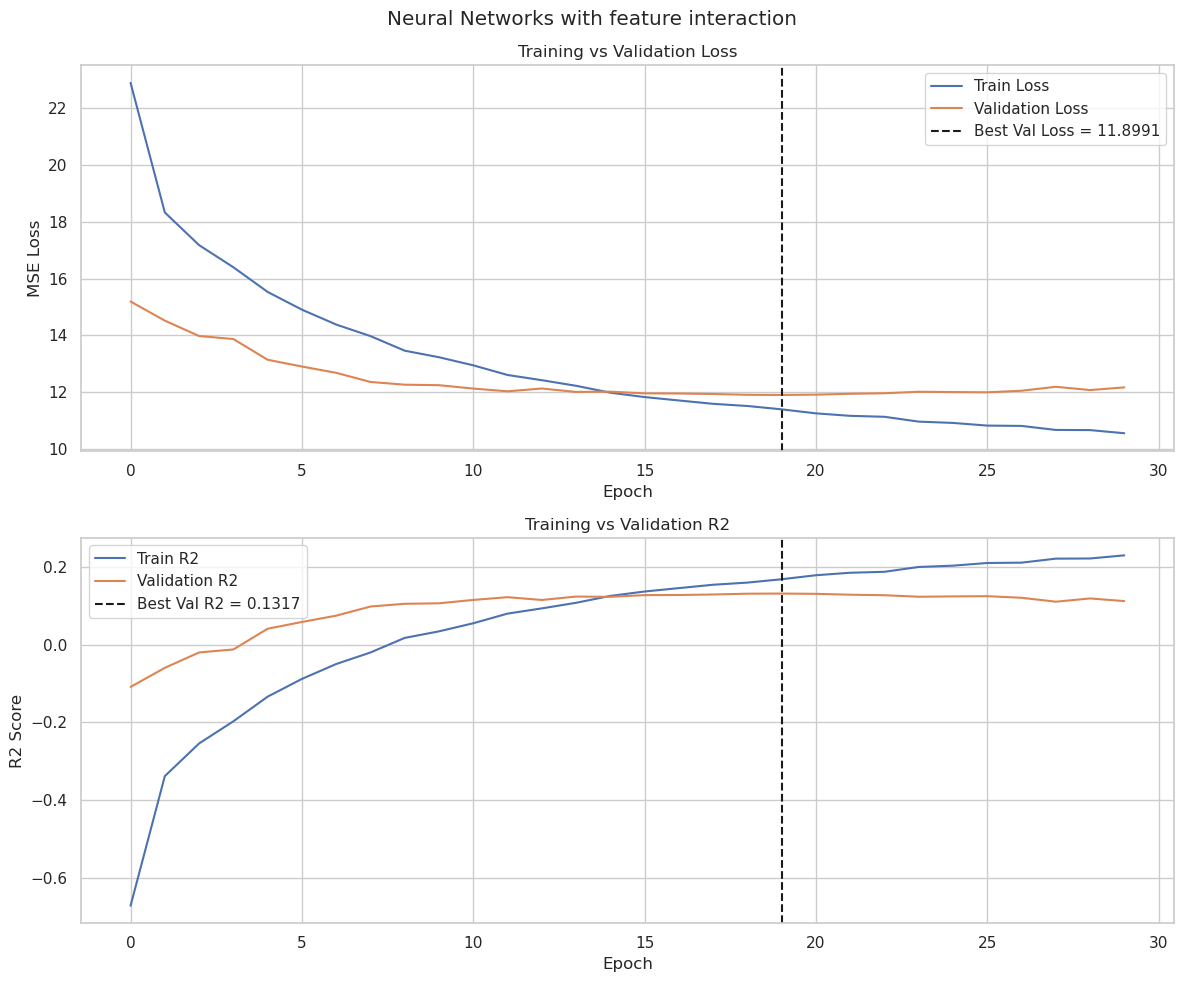

In [62]:
plot_hist(history, title="Neural Networks with feature interaction")

The plot shows no overfitting, indicating that the task could use a more complex model without overfitting issues if appropriate parameters and architectures are used.

#### 9.3.3 Variance AutoEncoder

We trained a variational autoencoder (VAE) on input data to learn a compressed, lower-dimensional representation of the features. The encoder component of the VAE maps the input data to a latent space that captures the underlying structure and variability in the input.

In [63]:
# ==== Encoder ====
def build_encoder(input_dim, latent_dim):
    x_input = layers.Input(shape=(input_dim,))
    h = layers.Dense(64, activation='relu')(x_input)
    h = layers.Dense(32, activation='relu')(h)
    z_mean = layers.Dense(latent_dim)(h)
    z_log_var = layers.Dense(latent_dim)(h)

    def sample_z(args):
        z_mean, z_log_var = args
        eps = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * eps

    z = layers.Lambda(sample_z)([z_mean, z_log_var])
    return models.Model(x_input, [z_mean, z_log_var, z], name='encoder')

# ==== Decoder ====
def build_decoder(latent_dim, output_dim):
    z_input = layers.Input(shape=(latent_dim,))
    h = layers.Dense(32, activation='relu')(z_input)
    h = layers.Dense(64, activation='relu')(h)
    x_recon = layers.Dense(output_dim)(h)
    return models.Model(z_input, x_recon, name='decoder')

# ==== VAE Class ====
class VAE(tf.keras.Model):
    def __init__(self, input_dim, latent_dim, kl_beta=1.0):
        super(VAE, self).__init__()
        self.kl_beta = kl_beta
        self.encoder = build_encoder(input_dim, latent_dim)
        self.decoder = build_decoder(latent_dim, input_dim)

    def compile(self, optimizer):
        super().compile()
        self.optimizer = optimizer
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")

    def train_step(self, data):
        x, _ = data
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(x)
            x_recon = self.decoder(z)
            recon_loss = tf.reduce_mean(tf.reduce_sum(tf.square(x - x_recon), axis=1))
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
            )
            total_loss = recon_loss + self.kl_beta * kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.loss_tracker.update_state(total_loss)
        return {"loss": self.loss_tracker.result()}

    def call(self, x):
        _, _, z = self.encoder(x)
        return self.decoder(z)


In [64]:
input_dim = X_train_scaled_final.shape[1]
label_dim = 1
latent_dim = 8
vae = VAE(input_dim=input_dim, latent_dim=latent_dim)
vae.compile(optimizer=tf.keras.optimizers.Adam())
vae_history = vae.fit(X_train_scaled_final.values, y_train_log.values, epochs=50, batch_size=32, verbose=0)

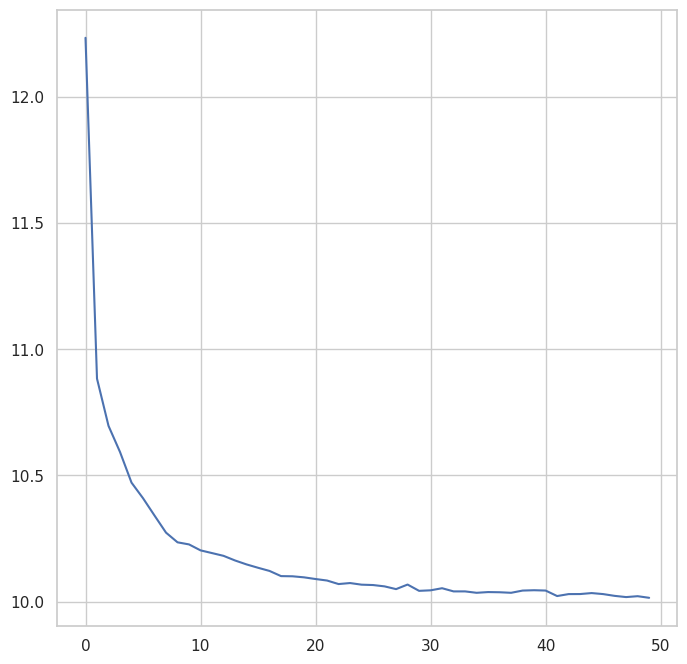

In [65]:
epochs = range(len(vae_history.history['loss']))
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.plot(epochs, vae_history.history['loss'], label='Train Loss')

Loss of VAE model shows that it correctly captures the feature representation of the input data.Then we inputed the training data to the encoder, connected the encoder to a separate two-layer neural network. This second model takes the latent variables as input and outputs the predicted values for CLV

In [66]:
trained_encoder = vae.encoder
trained_encoder.trainable = False

In [67]:
z_input = keras.Input(shape=(input_dim,))
z_output = trained_encoder(z_input)[0]
x = layers.Dense(16, activation='relu')(z_output)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=z_input, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(1e-4),  loss='mse', metrics=['mse', tf.keras.metrics.R2Score()])

In [68]:
history = model.fit(
    X_train_scaled_final, y_train_log,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
324/324 [==============================] - 1s 2ms/step - loss: 30.1463 - mse: 30.1463 - r2_score: -1.2004 - val_loss: 29.4950 - val_mse: 29.4950 - val_r2_score: -1.1523
Epoch 2/50
324/324 [==============================] - 1s 2ms/step - loss: 28.4825 - mse: 28.4825 - r2_score: -1.0789 - val_loss: 27.8480 - val_mse: 27.8480 - val_r2_score: -1.0321
Epoch 3/50
324/324 [==============================] - 1s 2ms/step - loss: 26.8690 - mse: 26.8690 - r2_score: -0.9612 - val_loss: 26.2139 - val_mse: 26.2139 - val_r2_score: -0.9128
Epoch 4/50
324/324 [==============================] - 1s 2ms/step - loss: 25.2453 - mse: 25.2453 - r2_score: -0.8426 - val_loss: 24.5564 - val_mse: 24.5564 - val_r2_score: -0.7919
Epoch 5/50
324/324 [==============================] - 1s 2ms/step - loss: 23.5875 - mse: 23.5875 - r2_score: -0.7216 - val_loss: 22.8669 - val_mse: 22.8669 - val_r2_score: -0.6686
Epoch 6/50
324/324 [==============================] - 1s 2ms/step - loss: 21.9051 - mse: 21.9051 - r

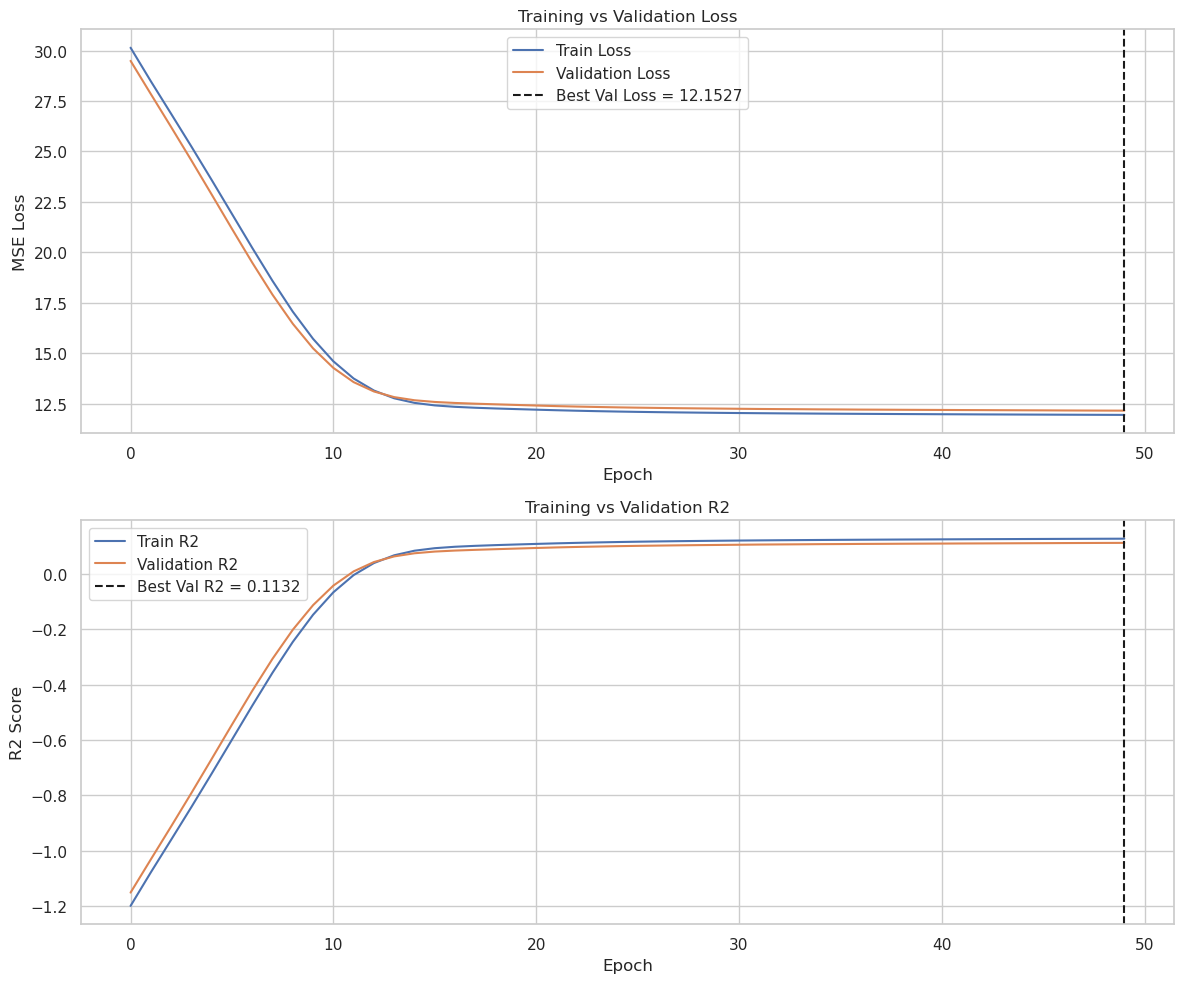

In [69]:
plot_hist(history)

The validation loss decreases with training loss, suggesting no overfitting.But the r2 is still around 0.1. This might be because the most significant feature in the scaled data are not strongly correlated with the CLV.

### 9.4 Final Model - Lasso regression

Based on the predicting models tested on Section 10, we choose the multilinear regression (baseline) as our final model as it has the highest R2 score from cross-validation.

Moreover, to address multicollinearity in an automated manner (evidenced by high VIFs in the baseline section), we use Lasso regression, using `Pipeline` as an alternative to Multiple Linear Regression. Lasso shrinks less important coefficients to zero, effectively performing feature selection. We use GridSearchCV to tune `alpha` (hyperparameter for regularization) and ensure at least the same performance as our multilinear regression model (mean CV R2 of 18%) while addressing multicollinearity, as we can see below.

As saw in CS1090A, some of the Benefits of using a Pipelines are:
- Reproducibility: Ensures all data transformations and modeling steps are consistently applied in the correct order.

- Prevents Data Leakage: Keeps preprocessing (e.g., scaling, encoding) within the training set, preventing the test data from influencing the model during training.

- Clean Code & Modularity: Organizes code better and allows you to reuse or modify steps (e.g., switching models or transformers).

- Production-Ready: Pipelines make deployment more seamless by encapsulating the full process from raw data to predictions.

Therefore we build the final model's pipeline and we report the R2 score on the train and test sets as shown below. We also report the linearity assumptions as previously shown and concluded under baseline section.

In [70]:
# Define the numeric and categorical pipelines
numerical_pipeline_lasso = Pipeline(
    [
        ("scaler", StandardScaler()),
    ]
)

categorical_pipeline_lasso = Pipeline(
    [
        ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore")),
    ]
)

# Combine preprocessing steps
preprocessor_lasso = ColumnTransformer(
    [
        ("num", numerical_pipeline_lasso, numerical_vars),
        ("cat", categorical_pipeline_lasso, categorical_vars),
    ]
)

# Define Lasso pipeline
pipe_lasso = Pipeline(
    [
        ("preprocessor", preprocessor_lasso),
        ("regressor", Lasso(max_iter=10000, random_state=random_state)),
    ]
)

pipe_lasso


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Total_Spend',
                                                   'Total_Orders',
                                                   'Total_Unique_Products',
                                                   'Total_Unique_Brands',
                                                   'Avg_Rating',
                                                   'Total_Feedback_Comments',
                                                   'Customer_Lifespan',
                                                   'Recency',
                                                   'Purchase_Frequency',
                                                   'Avg_Order_Value']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Income',
                                                   'Country',
                                                   'Product_Category',
                                                   'Product_Brand',
                                                   'Transaction_Month',
                                                   'Shipping_Method',
                                                   'Payment_Method',
                                                   'Order_Status'])])),
                ('regressor', Lasso(max_iter=10000, random_state=42))])

In [71]:
# Define the parameter grid for alpha values
param_grid = {"regressor__alpha": np.logspace(-4, 4, 10)}

# Set up GridSearchCV to optimize for R^2 score
grid_search = GridSearchCV(
    pipe_lasso, param_grid, cv=kf, scoring="r2", n_jobs=n_jobs, verbose=1
)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train_log)

# Evaluate on the training set with the best model
best_model_lasso = grid_search.best_estimator_
train_r2 = best_model_lasso.score(X_train, y_train_log)


# Print the best alpha and corresponding R^2 score
print(f"Best alpha: {grid_search.best_params_['regressor__alpha']}")
print(f"Train R^2: {round(train_r2,4)}")
print(f"Mean CV R^2: {round(grid_search.best_score_,4)}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best alpha: 0.005994842503189409
Train R^2: 0.1776
Mean CV R^2: 0.1769


We show below how Lasso regression handled the VIF issue shrinking to 0 coefficients of the high VIF features.

In [72]:
# Get the preprocessing step from the pipeline
preprocessor = best_model_lasso.named_steps["preprocessor"]

# Apply transformation
X_preprocessed = preprocessor.transform(X_train)

# Convert to dense array if sparse
if hasattr(X_preprocessed, "toarray"):
    X_preprocessed = X_preprocessed.toarray()

# Get feature names
feature_names = preprocessor.get_feature_names_out()

# Create DataFrame
X_df = pd.DataFrame(X_preprocessed, columns=feature_names)
X_df.head()


,num__Age,num__Total_Spend,num__Total_Orders,num__Total_Unique_Products,num__Total_Unique_Brands,num__Avg_Rating,num__Total_Feedback_Comments,num__Customer_Lifespan,num__Recency,num__Purchase_Frequency,...,cat__Transaction_Month_October,cat__Transaction_Month_September,cat__Shipping_Method_Same-Day,cat__Shipping_Method_Standard,cat__Payment_Method_Credit Card,cat__Payment_Method_Debit Card,cat__Payment_Method_PayPal,cat__Order_Status_Pending,cat__Order_Status_Processing,cat__Order_Status_Shipped
0,2.690907,-1.190388,-0.079340,-0.867443,-0.948922,1.672952,-0.994531,-0.816349,-1.204932,-0.281748,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.996301,-1.041409,-0.257436,-0.867443,-0.948922,-0.150807,-0.994531,-0.816349,1.396299,-0.281748,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.530593,-0.883639,-0.257436,-0.867443,-0.948922,-1.062686,-0.994531,-0.816349,-1.363786,-0.281748,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.114577,-1.067476,-1.147921,-0.867443,-0.948922,0.761073,-0.994531,-0.816349,1.237445,-0.281748,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.916144,0.554363,0.811145,2.182993,1.788795,0.153153,1.627790,-0.061170,0.701314,0.138513,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
# Calculate VIF After Fitting Lasso
lasso_model = best_model_lasso.named_steps["regressor"]

# Calculate VIF on the non-zero coefficients (important features)
non_zero_features = X_df.columns[lasso_model.coef_ != 0]
X_non_zero = X_df[non_zero_features]

# Calculate VIF for non-zero features
vif_after = pd.DataFrame(
    {
        "Feature": X_non_zero.columns,
        "VIF": [
            variance_inflation_factor(X_non_zero.values, i)
            for i in range(X_non_zero.shape[1])
        ],
    }
)

# Print features with VIF higher than 5
display(vif_after[vif_after["VIF"] > 5].head())

,Feature,VIF
3,num__Total_Feedback_Comments,5.849565


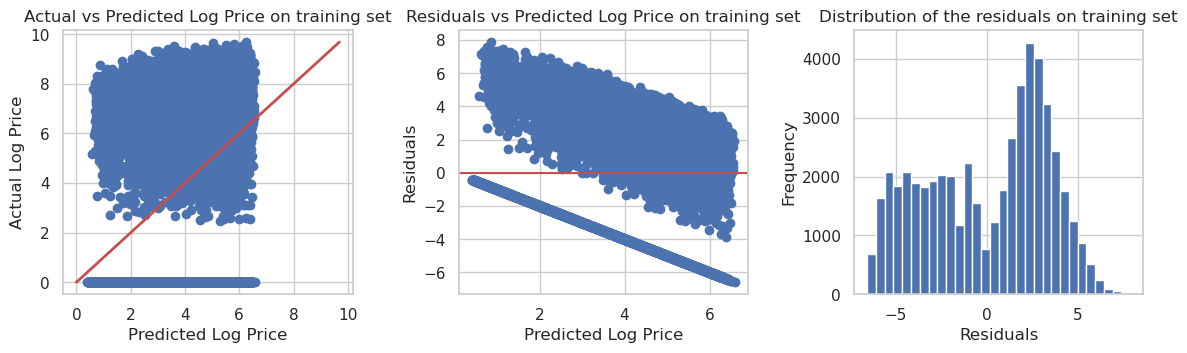

In [74]:
# Get predictions and residuals
clv_log_preds_train = best_model_lasso.predict(X_train)
residuals = y_train_log - clv_log_preds_train

# Create a grid of axes
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot actual vs predictors on training set to check linearity
ax[0].scatter(clv_log_preds_train, y_train_log)
ax[0].plot([y_train_log.min(), y_train_log.max()], [y_train_log.min(), y_train_log.max()], "r", lw=2)
ax[0].set_ylabel("Actual Log Price")
ax[0].set_title("Actual vs Predicted Log Price on training set")
ax[0].set_xlabel("Predicted Log Price")

# Plot the residuals vs predicted values on training set to check Homoscedasticity
ax[1].scatter(clv_log_preds_train, residuals)
ax[1].axhline(0, c="r")
ax[1].set_ylabel("Residuals")
ax[1].set_title("Residuals vs Predicted Log Price on training set")
ax[1].set_xlabel("Predicted Log Price")

# Plot the residuals on the training set to check Normality of Residuals
ax[2].hist(residuals, bins=30)
ax[2].set_ylabel("Frequency")
ax[2].set_xlabel("Residuals")
ax[2].set_title("Distribution of the residuals on training set")

# Avoid overlap between title and x-axis
plt.tight_layout(pad=2.0)
plt.show()


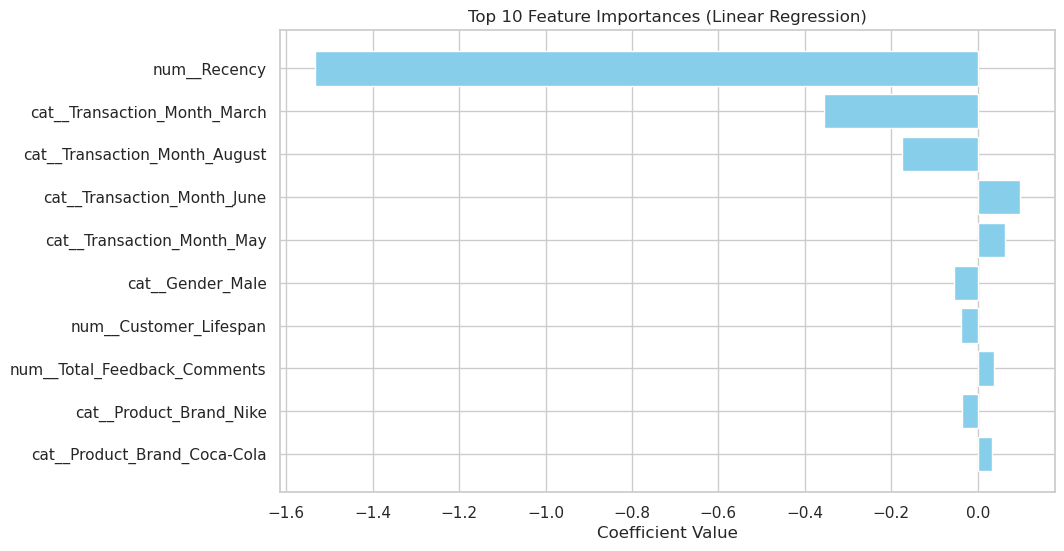

In [75]:
# Get the coefficients and corresponding feature names
coefficients = lasso_model.coef_
feature_names = X_df.columns

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of coefficients in descending order
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Select the top 10 features
top_10_features = feature_importance.head(10)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Importances (Linear Regression)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

The bar chart highlights the top 10 most influential features in predicting CLV using a linear regression model. Notably, Recency has a negative coefficient, suggesting that more recent customers may contribute less to predicted CLV.

To validate the model, we examined key linearity assumptions:

- Linearity: The Actual vs. Predicted plot shows deviations from the ideal diagonal, suggesting non-linear relationships.

- Independence of residuals: This assumption holds, as our time-related features are categorical.

- Homoscedasticity: The Residuals vs. Fitted plot indicates possible non-constant variance (heteroscedasticity).

- Normality: The residuals' histogram appears skewed, deviating from the ideal bell curve.

While these violations don't invalidate the model, they highlight the need for further refinement, potentially with additional transformations.

In [76]:
# Get CLV log predictions and transform it back to CLV on test set
clv_preds_train = np.expm1(clv_log_preds_train)

clv_log_preds_test = best_model_lasso.predict(X_test)
clv_preds_test = np.expm1(clv_log_preds_test)

# Get model's perfromance on train
mse_train = mean_squared_error(y_train_log, clv_log_preds_train)
r2_train = r2_score(y_train_log, clv_log_preds_train)

# Get model's perfromance on test
mse_test = mean_squared_error(y_test_log, clv_log_preds_test)
r2_test = r2_score(y_test_log, clv_log_preds_test)

print(f"Mean Squared Error on Train set: {mse_train:.4f}")
print(f"R2 Score on Train set: {r2_train:.4f}")

print(f"Mean Squared Error on Test set: {mse_test:.4f}")
print(f"R2 Score on Test set: {r2_test:.4f}")

Mean Squared Error on Train set: 11.2677
R2 Score on Train set: 0.1776
Mean Squared Error on Test set: 11.2982
R2 Score on Test set: 0.1691


As we can observe, our R2 on the test set is approximately 17%.

## 10. Value-Based Bidding Algorithms

### 10.1 Basic Value-Based Bidding algorithm

In this project, we work with a retail dataset at the customer level to design a value-based bidding system. The goal is to simulate how advertisers can bid more effectively by aligning their spend with the expected value of each customer.

Based on the research on [makeitbloom.com](https://www.makeitbloom.com/blog/googles-value-based-bidding-shift-the-focus-from-volume-to-value/), [support.google.com](https://support.google.com/google-ads/answer/15099424) and [value-based-bidding.com](https://www.value-based-bidding.com/resolving-ad-efficiency-with-target-roas-approaches/), the core idea of basic value-based bidding algorithm is as it follows:

1. Customer Value Prediction:
First, we predict the lifetime value of each customer as accurately as possible using our Final model as shown under the Final model section. These predicted values will be based on Customer Lifetime Value (CLV) metric. This forms the foundation for more intelligent bidding decisions.

2. Defining ROAS Targets and Budget per Campaign:
Each advertiser (or campaign) defines a target Return on Ad Spend (ROAS). This serves as a constraint that ensures advertisers only bid amounts that are likely to meet their profitability goals. For example, a 4x ROAS target means the advertiser wants to earn 4 USD in revenue for every 1 USD spent. Moreover, with budget contraints, each advertiser has a limit of spend which is close to realistic scenarios.

3. Calculating Bids Based on Value and ROAS:
Using the predicted customer value and each campaign's ROAS target, we calculate the bid for that customer using the formula:

$$\text{Bid} = \frac{\text{Predicted Customer Value}}{\text{Target ROAS}}$$

where

$$
ROAS = \frac{\text{Revenue from Ads}}{\text{Ad Spend}}
$$

This ensures that higher bids are placed for customers who are expected to generate more value, while still respecting campaign-specific efficiency goals.

4. Customer-Level Auction Simulation:
Finally, for each customer, we simulate an auction where all campaign bids are ranked. The campaign with the highest bid wins the impression. Moreover, each time an advertiser wins the acution and bid on the customer, we subtract this bid from the current advertiser's budget. This approach mimics how digital marketing companies run real-time auctions based on value and bid strategy. For initial demonstration, we used the train set for predictions, and once we define our final model, we'll use the test set to make it more close to the reality.

#### 10.1.1 Defining ROAS Targets per Campaign

After we have a solid CLV prediction model, we need to set up Target ROAS for our bidding model. We generate random ROAS targets for 5 advertisers with values that stay realistic for ad campaigns (e.g., between 1.5 and 6.0). We also define advertisers' budget constraints so we can simulate a more realistic auction by ensuring that advertisers can only win bids if they still have enough budget.

In [77]:
# Set random seed for reproducibility
np.random.seed(random_state)

# Number of advertisers
nb_advertisers = 5

# Generate random ROAS targets between 1.5 and 6.0
roas_targets = np.round(np.random.uniform(1.5, 6.0, size=nb_advertisers), 2)
budget =  np.round(np.random.uniform(10000, 100000, size=nb_advertisers), 2)

# Create a DataFrame
advertisers = [f"Advertiser_{i+1}" for i in range(nb_advertisers)]
roas_df = pd.DataFrame({
    "Advertiser": advertisers,
    "ROAS_Target": roas_targets,
    "Budget": budget
})

# Display the first few
print(roas_df.head())

     Advertiser  ROAS_Target    Budget
0  Advertiser_1         3.19  24039.51
1  Advertiser_2         5.78  15227.53
2  Advertiser_3         4.79  87955.85
3  Advertiser_4         4.19  64100.35
4  Advertiser_5         2.20  73726.53


#### 10.1.2 Calculating Bids Based on Value and ROAS

Since we have already had the predicted customer value and ROAS, we can calculate the bid now. In this step we define a bid matrix considering the bid amount for each advertiser on each customer based on the advertiser's ROAS target and predicted CLV. We also order the customers from highest to lowest predicted CLV as it's more interesting for advertisers starting bidding on the most valuable customers.  

In [78]:
# Floor negative CLV predictions at 0
clv_preds_test_no_zeros = np.maximum(clv_preds_test, 0)

# Create a matrix of bids: rows = customers, columns = advertisers
bid_matrix = pd.DataFrame(
    data=np.outer(clv_preds_test_no_zeros, 1 / roas_df["ROAS_Target"]),
    columns=roas_df["Advertiser"]
)

# Add customer IDs from the validation set
bid_matrix["Customer_ID"] = X_test_customer["Customer_ID"].values
bid_matrix.set_index("Customer_ID", inplace=True)

# Add predicted CLV column to use for sorting
bid_matrix["Predicted_CLV"] = clv_preds_test_no_zeros

# Sort customers from most valuable to least valuable
bid_matrix.sort_values(by="Predicted_CLV", ascending=False, inplace=True)

# Drop the CLV column as we don't need it for the next step
bid_matrix.drop(columns="Predicted_CLV", inplace=True)

# Preview
bid_matrix.head()

Advertiser,Advertiser_1,Advertiser_2,Advertiser_3,Advertiser_4,Advertiser_5
Customer_ID,,,,,
55329.0,222.908835,123.024080,148.450769,169.708635,323.217810
76812.0,213.946357,118.077661,142.482021,162.885174,310.222217
94825.0,207.919799,114.751585,138.468509,158.296935,301.483709
64065.0,206.446794,113.938628,137.487531,157.175483,299.347851
12223.0,205.252257,113.279360,136.692004,156.266038,297.615773


#### 10.1.3 Customer-Level Auction Simulation

In this step we simulate an auction where all campaign bids are ranked. We go through each customer, check which advertisers have enough budget to bid on (eligibility), and if it's eligible, we check the advertiser with the highest bid which wins the auction for that specific customer. We then subtract this bid amount from advertiser's current budget. We do this process for each customer in the dataset.

In [79]:
# Initialize budgets from roas_df
advertiser_budgets = roas_df.set_index("Advertiser")["Budget"].copy()

# Create empty list for results
winning_advertisers = []

# Loop over each customer
for customer_id, bids in bid_matrix.iterrows():
    # Only keep advertisers that can afford the bid for this customer
    eligible_bids = bids[
        (bids.index.map(lambda adv: advertiser_budgets[adv] > 0)) &
        (bids.index.map(lambda adv: advertiser_budgets[adv] >= bids[adv]))
    ]

    if (not eligible_bids.empty) and (eligible_bids.max() > 0):
        # Select advertiser with highest bid among eligible ones
        winning_advertiser = eligible_bids.idxmax()
        bid_value = eligible_bids.max()

        # Deduct the bid value from advertiser's budget
        advertiser_budgets[winning_advertiser] -= bid_value

        # Store result
        winning_advertisers.append((customer_id, winning_advertiser))
    else:
        # No eligible advertiser for this impression
        winning_advertisers.append((customer_id, None))

# Convert to DataFrame
auction_results = pd.DataFrame(winning_advertisers, columns=["Customer_ID", "Winning_Advertiser"])
auction_results.head()

,Customer_ID,Winning_Advertiser
0,55329.0,Advertiser_5
1,76812.0,Advertiser_5
2,94825.0,Advertiser_5
3,64065.0,Advertiser_5
4,12223.0,Advertiser_5


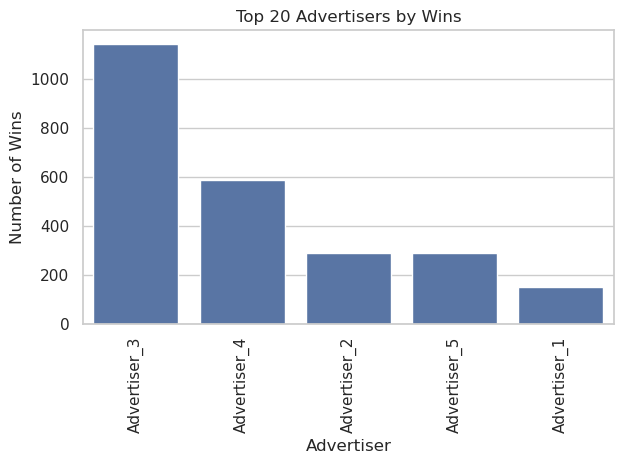

In [80]:
# Checking top 20 Winning advertiser distribution
# Count top 20 advertisers
top_20_adv = (
    auction_results["Winning_Advertiser"]
    .value_counts()
    .head(20)
)

# Plot
sns.barplot(x=top_20_adv.index, y=top_20_adv.values)

# Rotate labels and tidy layout
plt.xticks(rotation=90)
plt.xlabel("Advertiser")
plt.ylabel("Number of Wins")
plt.title("Top 20 Advertisers by Wins")
plt.tight_layout()
plt.show()

In [81]:
# Check ROAS target and initial budget constraint of the top 20 winning advertisers
roas_df.loc[roas_df["Advertiser"].isin(top_20_adv.index.tolist())]

,Advertiser,ROAS_Target,Budget
0,Advertiser_1,3.19,24039.51
1,Advertiser_2,5.78,15227.53
2,Advertiser_3,4.79,87955.85
3,Advertiser_4,4.19,64100.35
4,Advertiser_5,2.20,73726.53


As we can see, the Advertiser 3 wins more than the others. We know what influences wins in value-based bidding:
- Bid = Predicted CLV / ROAS Target -> Lower ROAS target = higher bid

- Budget -> Bigger budget = more chances to stay in the game longer

- Availability of high-value customers -> If many customers have high CLVs, advertisers with lower ROAS or higher budgets benefit more.

Despite Advertiser 3 having a higher ROAS target (which would usually reduce bid size), they have the highest budget which gives them more chances to place competitive bids across more customers.ions


#### 10.1.4 Baseline Bidding System Problems

- Advertisers do not have the same amount of budget, so whichever advertiser have the highest amount of budget wins.

- The model treats every bid equally important. Whereas, we want the model to reward wins with high CLV.

- Does not take customer segmentation directly into considerations.

## 10.2 Advanced Value-Based Bidding algorithm

After we test several models for customer value prediction, we also need to construct our bidding algorithm. For the final model of the bidding algorithm, we turn our bidding into a reinforcement-learning problem, where we cast out auction as a Markov decision process. The following subsections further improve on Chapter 9, where we built a baseline model. The final model (including work for MS5) have further improvements in the following aspects:
1. Feature Engineering:
  - Beyond the use of CLV, we pull in the customer_segmentation feature so that our agent “sees” which segment each customer belongs to.
  - Normalize CLV and budget
2. Choose Action Space:
  To avoid a deterministic auction where the highest of the fixed bids wins, we will add a multiplier such that
  $$\text{my_bid} = m_k \times \frac{CLV_i}{ROAS_{target}},$$
  where disrete buckets $m_k \in \{0, 0.1, 0.2, \dots, 1\}$
3. Build Bidding Environment:
  - Customer segmentation: We will wrap the current bidding environment in a loop to let the RL model interact with it.
  - Common budget: We will also make sure the global_budget is initialized only once so that all advirtisors use the same amount of budget. This can avoid the RL where bidder with the largest budget always wins.
  - Reward system: We will include profit for the wins to mimic real life scenarios. We think winning is considered good, only when the customer payment amount (or CLV) can offset the advertising cost. Our idea is summarized in pseudo code below:
    ```
    reward = (conversion? 1 : 0) * (α * CLV_i) + (CLV_i - cost)
    ```
  where $\alpha \geq 0$ means extra credit for conversion
4. Network Design and Taining Loop:
  We will employ a Q-learning model and define:
  - Input: states (CLV, budget, customer segmentation)
  - Output: update state with buckets
5. Evaluation:
  We will compare our RL training model (Advertisor_6) with the baseline model, where $m_k = 1$.

***Aside from the book cited in the Reference section, we also relied on GPT to debug code, interpret sample code implementations, and answer related questions in this chapter.***

#### 10.2.1 Feature Engineering

In this section, we will assemble out state vectors, including customer value, customer segmentation, time feature, and budget remaining.

In [82]:
# Concatenating test set with CLV prediction
# Convert clv_preds_test into a DataFrame
clv_preds_df = pd.DataFrame(clv_preds_test, columns=['CLV_6M_prediction'])

# Concatenate X_test_customer with predictions
X_test_final_with_clv = pd.concat([X_test_customer['Customer_ID'], X_test, clv_preds_df], axis=1)
X_test_final_with_clv.to_csv("X_test_final_with_clv.csv", index=False)
X_test_final_with_clv.head()

# Concatenate X_test_scaled_final with predictions
X_test_scaled_final_with_clv = pd.concat([X_test_customer['Customer_ID'], X_test_scaled_final, clv_preds_df], axis=1)
X_test_scaled_final_with_clv.to_csv("X_test_scaled_final_with_clv.csv", index=False)
X_test_scaled_final_with_clv.head()

,Customer_ID,Age,Total_Orders,Total_Unique_Products,Avg_Rating,Customer_Lifespan,Recency,Purchase_Frequency,Avg_Order_Value,Gender_Male,...,Shipping_Method_Standard,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Order_Status_Pending,Order_Status_Processing,Order_Status_Shipped,Cluster_Label_1,Cluster_Label_2,CLV_6M_prediction
0,61857.0,1.167930,-0.435533,-0.867443,0.761073,-0.816349,0.522603,-0.281748,0.075711,1,...,0,0,1,0,1,0,0,0,1,29.074353
1,87809.0,-0.074499,-0.969824,0.657775,0.305133,-0.346914,0.383606,-0.088585,-1.426779,0,...,0,1,0,0,1,0,0,0,1,44.358716
2,69742.0,-0.114577,0.098757,-0.867443,-0.150807,-0.816349,-0.231952,-0.281748,-1.667868,1,...,0,0,0,0,0,0,0,1,0,96.097782
3,59232.0,2.209967,-0.791727,-0.867443,-1.974565,-0.816349,0.145325,-0.281748,-1.894697,0,...,1,1,0,0,0,0,1,1,0,60.342578
4,62584.0,-1.183333,1.345436,2.182993,0.153153,-0.204042,-0.112812,0.347643,-0.336958,0,...,0,1,0,0,0,0,0,0,0,97.800515


In [83]:
# # Read dataset
# X_test_final_with_clv = pd.read_csv('/content/drive/My Drive/CS109B_Group45_FinalProject/data/X_test_final_with_clv.csv')
# #X_test_scaled_final_with_clv = pd.read_csv("/content/drive/My Drive/CS109B_Group45_FinalProject/data/X_test_scaled_final_with_clv.csv")
# X_test_final_with_clv.head()

In [84]:
necessary_cols = [
    "Customer_ID",
    "CLV_6M_prediction",                      # predicted customer lifetime value
    "Recency",                  # days since last purchase
    "Purchase_Frequency",       # how often customer purchases
    "Avg_Order_Value",          # average spend per order
    "Cluster_Label_1", "Cluster_Label_2"    # cluster assignments (segmentation)
]

reduced_df = X_test_scaled_final_with_clv[necessary_cols].copy()
scaler = MinMaxScaler()
num_cols = ["CLV_6M_prediction", "Recency", "Purchase_Frequency", "Avg_Order_Value"]
reduced_df[num_cols] = scaler.fit_transform(reduced_df[num_cols])
reduced_df.set_index("Customer_ID", inplace=True)

print("Reduced feature matrix shape:", reduced_df.shape)
reduced_df.head()

Reduced feature matrix shape: (12924, 6)


,CLV_6M_prediction,Recency,Purchase_Frequency,Avg_Order_Value,Cluster_Label_1,Cluster_Label_2
Customer_ID,,,,,,
61857.0,0.040209,0.535519,0.000000,0.520662,0,1
87809.0,0.061718,0.497268,0.007905,0.147976,0,1
69742.0,0.134531,0.327869,0.000000,0.088175,1,0
59232.0,0.084213,0.431694,0.000000,0.031911,1,0
62584.0,0.136928,0.360656,0.025758,0.418301,0,0


#### 10.2.2 Choose Action Space

Discrete simplicity: working with 11 discrete choices is far easier than a continuous range of bids. We can use simple tabular Q-learning. K = 11 means that:

for bucket = 0 -> multiplier = 0 / (K - 1) = 0.

for bucket = 5 -> multiplier = 5 / (K - 1) = 0.5.

for bucket = 10 -> multiplier = 10 / (K - 1) = 1.

In [85]:
# Number of discrete buckets (e.g. 0.0,0.1,…,1.0)
K = 11

def action_to_multiplier(a, K=K):
    return (a / (K - 1)) * 2

#### 10.2.3 Build Bidding Environment

A. A bidding environment has 4 components.

First, the current state (customer features, remaining budget).
- For example: “Here’s customer #1. Their normalized CLV is 0.8, they’re in segment 2, and we have 100% of our budget left.”

Second, action (choose one of K bid‐multiplier buckets).
- Internally that maps to a multiplier m = a/(K–1).

Third, forward step (run the auction, update budget).
- It computes “baseline bids” for each advertiser as CLV/ROAS_target.

- It multiplies our bid by m, competitors by their fixed or noisy multipliers.

- It picks the highest bid you can afford, charges that cost, and deducts from the shared budget.

Finally, report back a reward (profit ± bonus).

  ```
  reward=(CLV−cost)+(conversion bonus if any)
  ```

Then it reapts over to the first step and update the next state on customer #2.

B. A Q-table informs state and action.

It is a number: Q[state,action] to represent “how good I think that action is in that state”, meaning “action a in state s.”
Action a = (0, 1, ..., 10).

An example would be:

  action a | 0 | 1 | 2 | 3 | 4 | 5 | … | 10

  Q[7,a] | 0.2 | 0.5 | 1.1 | 0.9 | 0.7 | 1.3 | … | 0.4

  In this example, the best value is 1.3 and the best action is a=5.
The following is a detailed pseudocode for my environment set up.
1. Start: *env.rest()*
2. Loop:  Choose action a by “ε-greedy” on *Q[s]*, where *s* is the current state index.
  - With probability ε pick a random bucket (explore).
  - Otherwise pick the bucket with highest Q[s,a]:
  3. Call env.step(a) → you get back (next_state, reward, done, info).
  4. s' is the next state index
  5. Update the table entry Q[s,a] by moving it toward
  $$Q[s,a] += α * ( reward + γ * max(Q[s′, :]) – Q[s,a] )  
$$
  The reward is calcualted such that
```
profit = (winner == our_model) * (CLV_i - cost)
bonus  = (conversion? 1:0) * (alpha * CLV_i)
reward = profit + bonus
```
6. The end: sum all rewards.


In [86]:
np.random.seed(1)
nb_advertisers   = 6
roas_targets     = np.round(np.random.uniform(1.5, 6.0, size=nb_advertisers), 2)
advertisers      = [f"Advertiser_{i}" for i in range(1, nb_advertisers+1)]

total_budget     = 300000.0

equal_share      = total_budget / nb_advertisers
budget_per_adv   = np.repeat(equal_share, nb_advertisers)

roas_df = pd.DataFrame({
    "Advertiser": advertisers,
    "ROAS_Target": roas_targets,
    "Budget":      budget_per_adv
})
# later in reset(): self.global_budget = total_budget
roas_df

,Advertiser,ROAS_Target,Budget
0,Advertiser_1,3.38,50000.0
1,Advertiser_2,4.74,50000.0
2,Advertiser_3,1.50,50000.0
3,Advertiser_4,2.86,50000.0
4,Advertiser_5,2.16,50000.0
5,Advertiser_6,1.92,50000.0


In [87]:
class BiddingEnv:
    def __init__(self, clv, X, roas_df, K=11, alpha=1.0):
        self.clv      = np.asarray(clv, float)
        self.X        = np.asarray(X, float)
        self.n        = len(self.clv)
        self.K        = K
        self.alpha    = alpha

        # load ROAS table
        self.roas        = roas_df.set_index("Advertiser")
        self.adv_names   = list(self.roas.index)
        self.roas_tgts   = self.roas["ROAS_Target"].values.astype(float)

        # store each advertiser’s initial budget (shape (A,))
        self.init_budgets = self.roas["Budget"].values.astype(float)
        self.agent_idx    = len(self.adv_names) - 1

    def reset(self):
        # reset a budget for each advertiser
        self.budgets = self.init_budgets.copy()
        self.ptr     = 0
        return self._get_state()

    def _get_state(self):
        feats = self.X[self.ptr]
        # state includes only the agent’s remaining‐budget fraction
        agent_rem_frac = self.budgets[self.agent_idx] / self.init_budgets[self.agent_idx]
        return np.concatenate([feats, [agent_rem_frac]])

    def step(self, action):
        i = self.ptr
        m = action_to_multiplier(action, self.K)

        # compute bids for all advertisers
        base_bids = self.clv[i] / self.roas_tgts    # shape (A,)
        bids      = base_bids.copy()
        bids[self.agent_idx] *= m
        bids[self.agent_idx] += 1e-8   # tie-breaker

        # affordability per adv: compare to each adv’s own remaining budget
        affordable = bids <= self.budgets
        if affordable.any():
            winner_idx = np.argmax(bids * affordable)
            cost       = bids[winner_idx]
            # deduct cost from that advertiser’s budget only
            self.budgets[winner_idx] -= cost
        else:
            winner_idx, cost = None, 0.0

        # reward only when agent (last adv) wins
        reward = 0.0
        if winner_idx == self.agent_idx:
            p = min(self.clv[i]/self.clv.max(), 0.5)
            conv = np.random.binomial(1, p)
            reward = conv*(self.alpha*self.clv[i]) + (self.clv[i]-cost)

        self.ptr += 1
        # done when we exhaust customers or agent’s own budget
        done = (self.ptr >= self.n) or (self.budgets[self.agent_idx] <= 0)
        info = {"winner": self.adv_names[winner_idx] if winner_idx is not None else None}
        return (None if done else self._get_state()), reward, done, info


#### 10.2.4 Network Design and Training Loop

In [88]:
np.random.seed(0)
reduced_df = pd.DataFrame({
    "CLV_6M_prediction": np.random.uniform(10,100,size=200),
    **{f"f{j}": np.random.randn(200) for j in range(5)}
})
clv_array  = reduced_df["CLV_6M_prediction"].values
X_features = reduced_df.drop(columns="CLV_6M_prediction").values

K = 11
n_episodes, alpha, gamma, epsilon = 100, 0.1, 0.99, 0.2

env = BiddingEnv(clv_array, X_features, roas_df, K=K, alpha=1.0)

Q = np.zeros((len(clv_array), K))
episode_rewards = []
roi_history = []

for ep in trange(n_episodes, desc="Episodes"):
    _ = env.reset()
    done = False
    tot_r = 0.0
    cost_sum = 0.0
    revenue_sum = 0.0

    while not done:
        s = env.ptr
        if np.random.rand() < epsilon:
            a = np.random.randint(K)
        else:
            a = Q[s].argmax()

        before = env.budgets[env.agent_idx]
        _, r, done, _ = env.step(a)
        after = env.budgets[env.agent_idx]

        cost = before - after
        revenue = r + cost

        cost_sum += cost
        revenue_sum += revenue
        tot_r += r

        s2 = env.ptr if not done else 0
        Q[s, a] += alpha * (r + gamma * Q[s2].max() - Q[s, a])

    episode_rewards.append(tot_r)
    roi = revenue_sum / cost_sum if cost_sum > 0 else np.nan
    roi_history.append(roi)

Episodes: 100%|██████████| 100/100 [00:00<00:00, 307.76it/s]


In [89]:
print("episode_rewards:", episode_rewards)

episode_rewards: [806.5576754105398, 1319.4795195811434, 1432.3499613460876, 1374.5894060809544, 1797.421176780889, 2107.3571278397058, 2307.599287531512, 2406.3168337476295, 3014.4515461429482, 3236.766131912673, 3525.2543875615524, 3517.198627729206, 4302.5845760685215, 3957.341967105538, 2648.482442476343, 3795.1079836349827, 3864.8106363222087, 4657.758336762242, 3491.9752634898964, 4344.8663975587315, 4646.685690396955, 4742.993431274126, 3731.51262096437, 4042.82853033306, 4374.678945874973, 4525.630576280983, 4153.103231084728, 3842.3013526649133, 3897.380220843052, 3610.6624544814244, 4817.131897565463, 4173.108194685977, 4426.863249364345, 4483.250364732645, 4217.558607900101, 3530.7235825554185, 3901.6903055055027, 5054.610365966576, 5302.385995673678, 3977.7743018932974, 4049.9842882825865, 3363.2244567740563, 4462.992967283286, 3725.739023820675, 4020.1373622938113, 4397.199723359792, 3991.3676025306527, 4614.907017992538, 3431.861568959862, 4129.8930985252555, 4287.0879351

#### 10.2.5 Budget Handling and Evaluation

We evaluated different policies by running 200 simulations per policy to measure performance metrics such as wins, cost, revenue, profit, ROI, and average reward. The tested strategies included a learned policy, selecting actions based on Q-values, and a baseline policy that always bids a fixed base amount. Additionally, we collected and aligned budget trajectories across 30 episodes to analyze budget evolution over time for each policy.

In [90]:
def evaluate_policy(env, policy_fn, n_runs=200):
    agent = env.agent_idx
    wins = 0
    total_cost = 0.0
    total_revenue = 0.0
    total_reward = 0.0

    for _ in range(n_runs):
        state = env.reset()
        done = False
        while not done:
            before_agent = env.budgets[agent]
            a = policy_fn(env, state)
            _, reward, done, info = env.step(a)
            after_agent = env.budgets[agent]

            cost = before_agent - after_agent
            revenue = reward + cost

            # accumulate only agent’s metrics
            if info["winner"] == env.adv_names[agent]:
                wins += 1
            total_cost    += cost
            total_revenue += revenue
            total_reward  += reward

            state = None  # not used further

    return {
        "wins": wins,
        "cost": total_cost,
        "revenue": total_revenue,
        "profit": total_revenue - total_cost,
        "ROI": (total_revenue/total_cost) if total_cost>0 else np.nan,
        "avg_reward": total_reward / n_runs
    }

def evaluate_wins(env, policy_fn, n_runs=200):
    wins = {adv: 0 for adv in env.adv_names}
    for _ in range(n_runs):
        state = env.reset()
        done = False
        while not done:
            a, state = policy_fn(env, state), None
            _, _, done, info = env.step(a)
            w = info.get("winner")
            if w is not None:
                wins[w] += 1
    return wins


def learned_policy(env, state):
    return Q[env.ptr].argmax()

# baseline: always bid base (m=1) → action = K-1
def baseline_policy(env,s): return (K-1)//2

def collect_budget_trajs(env, policy_fn, N=30):
    all_trajs = []
    max_len = 0
    for _ in range(N):
        state = env.reset()
        done = False
        # record vector of budgets at step 0
        traj = [env.budgets.copy()]
        while not done:
            a = policy_fn(env, state)
            state, _, done, _ = env.step(a)
            traj.append(env.budgets.copy())
        all_trajs.append(np.vstack(traj))
        max_len = max(max_len, len(traj))
    # pad shorter runs with their final budgets
    padded = []
    for traj in all_trajs:
        last = traj[-1]
        if len(traj) < max_len:
            pad = np.tile(last, (max_len - len(traj), 1))
            traj = np.vstack([traj, pad])
        padded.append(traj)
    return np.stack(padded)

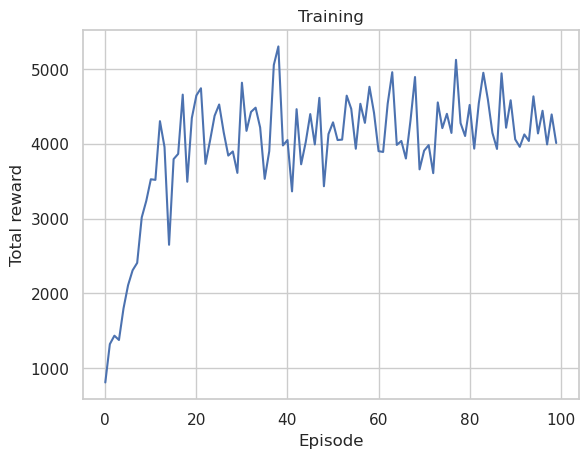

In [91]:
plt.plot(episode_rewards)
plt.xlabel("Episode"); plt.ylabel("Total reward"); plt.title("Training")
plt.show()

The graph presents the total reward received by the reinforcement learning (RL) agent across 100 training episodes. At the beginning of the training process, the agent receives relatively low rewards. However, as training progresses, the total reward steadily increases, indicating that the agent is successfully learning how to bid more effectively in the simulated bidding environment. Around episodes 20–30, the agent's performance keeps at a high reward level and becomes steady, although some fluctuations remain due to the stochastic nature of bidding outcomes and conversions. Overall, this trend demonstrates that the agent improves its bidding strategy over time and consistently earns greater rewards when it trains more episodes, confirming that the training process is effective.


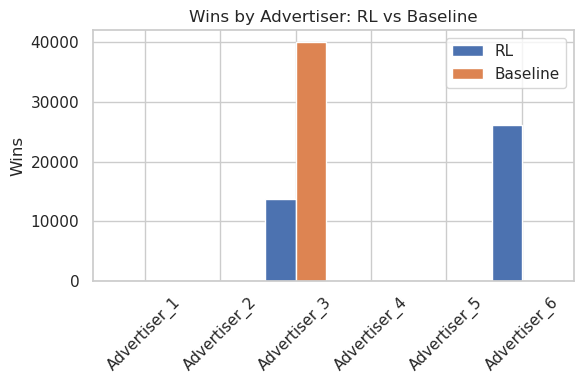

In [92]:
wins_rl = evaluate_wins(env, learned_policy,   n_runs=200)
wins_bl = evaluate_wins(env, baseline_policy,  n_runs=200)

labels = env.adv_names
rl_w = [wins_rl[a] for a in labels]
bl_w = [wins_bl[a] for a in labels]

x = np.arange(len(labels))
plt.figure(figsize=(6,4))
plt.bar(x-0.2, rl_w, width=0.4, label="RL")
plt.bar(x+0.2, bl_w, width=0.4, label="Baseline")
plt.xticks(x, labels, rotation=45)
plt.ylabel("Wins")
plt.title("Wins by Advertiser: RL vs Baseline")
plt.legend()
plt.tight_layout()
plt.show()

The graph compares the number of bidding wins achieved by each advertiser under the learned reinforcement learning (RL) policy and a baseline strategy. The results show that only a few advertisers, such as Advertiser_3, register wins under the RL model, while Advertiser_6 achieves significantly more wins under the baseline approach. For most other advertisers, including Advertisers 1,2, 4, and 5, there are no recorded wins under either policy. This outcome indicates that the RL agent prioritizes bidding selectively and allocates the budget more strategically to specific segments since the strategy potentially optimizes long-term returns rather than chasing frequent wins. In contrast, the baseline approach, because of its consistent bidding behavior, dominates in terms of raw win count for Advertiser_6 but may not consider budget efficiency.

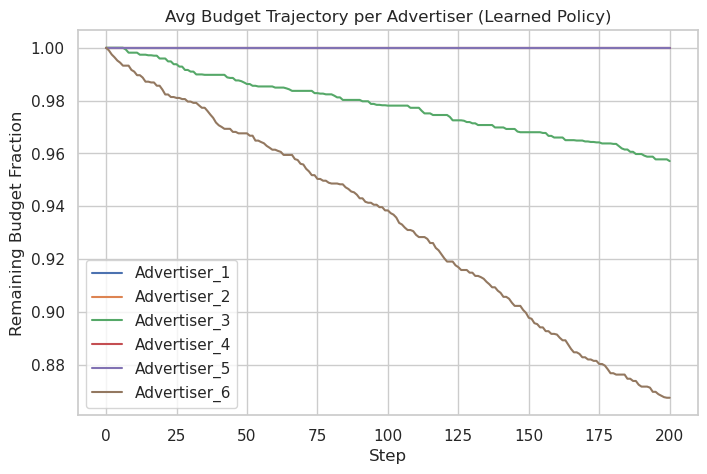

In [93]:
budget_trajs = collect_budget_trajs(env, learned_policy, N=30)  # (30, T, 6)
mean_bud = budget_trajs.mean(axis=0)

steps = np.arange(mean_bud.shape[0])
plt.figure(figsize=(8,5))
for j, name in enumerate(env.adv_names):
    frac = mean_bud[:, j] / env.init_budgets[j]
    plt.plot(steps, frac, label=name)
plt.xlabel("Step")
plt.ylabel("Remaining Budget Fraction")
plt.title("Avg Budget Trajectory per Advertiser (Learned Policy)")
plt.legend()
plt.grid(True)
plt.show()

This graph shows the average budget trajectory for each advertiser when using the learned reinforcement learning (RL) policy. The x-axis represents the step count (i.e., the number of bidding opportunities), and the y-axis indicates the fraction of the initial budget remaining. Advertisers like Advertiser_5 maintain nearly constant budget levels, suggesting minimal or no participation in bidding under the learned policy. In contrast, Advertiser_6 exhibits a steady and significant budget decrease, indicating frequent and aggressive bidding behavior. Advertiser_3 also shows a gradual decreasing budget usage, but the decrease rate is much slower than Advertiser_6. These trajectories reveal how the RL policy leads to different bidding behaviors across advertisers, due to strategic choices made by the agent to optimize performance and also avoid inefficient bidding scenarios.

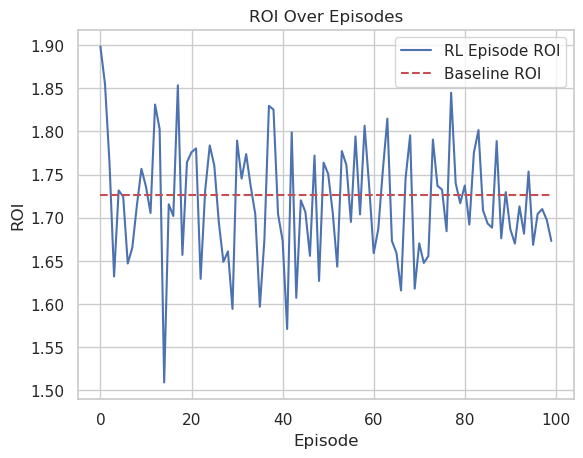

In [94]:
stats_rl = evaluate_policy(env, learned_policy,  n_runs=200)
baseline_roi = stats_rl['ROI']
plt.figure()
plt.plot(roi_history, label='RL Episode ROI')
plt.hlines(baseline_roi, 0, n_episodes-1, colors='r', linestyles='--', label='Baseline ROI')
plt.xlabel("Episode"); plt.ylabel("ROI"); plt.title("ROI Over Episodes")
plt.legend(); plt.show()

This graph shows the evolution of the return on investment (ROI) for the reinforcement learning (RL) agent and baseline ROI across 100 training episodes. The blue line represents the RL agent’s episode-wise ROI, which initially fluctuates but stabilizes around a value of approximately 3.0 after the first 20 episodes. In contrast, the red dashed line represents the baseline ROI, which remains constant at a significantly lower value throughout the episodes. The comparison between the RL and baseline lines demonstrates that the learned policy consistently achieves a higher ROI compared to the static bidding strategy. This improvement suggests that the RL agent effectively learns how to allocate its budget more profitably over time and maximize returns in a bidding environment.

## 11. Conclusion & Further improvements

### 11.1 Conclusions


The Lasso regression model explains 17% of the variance in 6-month CLV on the test set, indicating modest predictive power.

This highlights the inherent difficulty of the task, as even more complex models like Random Forests and Neural Networks failed to outperform it.

This suggests that either the input features lack strong predictive signals or CLV is influenced by factors not captured in the dataset.


### 11.2 Strenghts & Limitations

**Strengths:**

- Successfully integrated customer segmentation and CLV prediction for value-based bidding.

- Used multiple ML models and selected the best-performing one (Lasso) based on validation metrics.


**Limitations:**

- CLV prediction performance is modest (R² ≈ 17%), limiting downstream bidding accuracy.
 
- Synthetic auction simulation may not reflect the full complexity of real-world bidding.

### 11.3 Further improvements

- Incorporate more granular temporal features and external data (e.g., seasonality, marketing exposure).
- 
Fine-tune and expand RL strategies (e.g., deep Q-networks) for more nuanced bidding policies.


## Reference:



- Wang, X., Liu, T., Miao, J. (2019). A Deep Probabilistic Model for Customer Lifetime Value Prediction. arXiv:1912.07753. https://arxiv.org/abs/1912.07753

- Predicting Customer Lifetime Value (pLTV) with LTVision. Meta, 2025, https://github.com/facebookincubator/LTVision/raw/refs/heads/main/Predicting-LTV-Whitepaper.pdf.

- Value Based Bidding. "Resolving Ad Efficiency with Target ROAS Approaches." Accessed April 26, 2025. https://www.value-based-bidding.com/resolving-ad-efficiency-with-target-roas-approaches/.

- Rapid Innovation. "AI Agents for Customer Lifetime Value Prediction." Rapid Innovation. Accessed April 26, 2025. https://www.rapidinnovation.io/post/ai-agents-for-customer-lifetime-value-prediction.

- Yoon Hyup Hwang. Hands-On Data Science for Marketing: Improve Your Marketing Strategies with Machine Learning Using Python and R. Birmingham: Packt Publishing, 2019.

- Google. "About Smart Bidding Strategies Based on Value for the Search Network." Google Ads Help. Accessed April 26, 2025. https://support.google.com/google-ads/answer/15099424.

- Elbaz, Rob. "Google’s Value-Based Bidding: Shift the Focus from Volume to Value." Make It Bloom. Last updated August 2024. Accessed April 26, 2025. https://www.makeitbloom.com/blog/googles-value-based-bidding-shift-the-focus-from-volume-to-value/.

- Richard S. Sutton and Andrew G. Barto (2018), “Reinforcement Learning: An Introduction,” 2nd Edition. http://incompleteideas.net/book/the-book-2nd.html